<a href="https://colab.research.google.com/github/emichester/06MIAR_Aprendizaje_No_Supervisado/blob/main/MyTests/Tyre_Quality_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle ops

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files

In [6]:
files.upload() # upload the kaggle token kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emichester","key":"46ec706fb22725fd25fbe1ec023352e5"}'}

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                       Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          14042        447  1.0              
joebeachcapital/students-performance                          Students Performance                            2KB  2023-08-31 00:50:11           4871        130  1.0              
iamsouravbanerjee/airline-dataset                             Airline Dataset                                 8MB  2023-09-13 06:47:17           5339        122  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target     Zzzs: Lightweight training dataset + t

In [9]:
# !kaggle datasets download -d nomihsa965/large-scale-image-dataset-of-wood-surface-defects

In [10]:
!kaggle datasets download -d warcoder/tyre-quality-classification

100% 2.66G/2.66G [00:38<00:00, 40.8MB/s]
100% 2.66G/2.66G [00:38<00:00, 75.0MB/s]


In [11]:
%mkdir -p /kaggle/input

In [12]:
%mkdir /kaggle/input/tyre-quality-classification

In [13]:
!unzip /content/tyre-quality-classification.zip -d /kaggle/input/tyre-quality-classification

Archive:  /content/tyre-quality-classification.zip
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (1).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (10).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (100).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (1000).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (1001).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/Defective (1002).jpg  
  inflating: /kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/d

In [14]:
%cd /kaggle

/kaggle


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Conv2D,Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import Model
from sklearn.metrics import classification_report , confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print (dirname)

/kaggle/input
/kaggle/input/tyre-quality-classification
/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres
/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective
/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/good


In [16]:
good = glob.glob(r'/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/good/*.jpg')
defective = glob.glob(r'/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective/*.jpg')

random.shuffle(good)
random.shuffle(defective)

print ('number of good tyres : {} images'.format(len (good)))
print ('number of defective tyres : {} images'.format(len (defective)))

number of good tyres : 828 images
number of defective tyres : 1028 images


In [17]:
train_good = good [:int (len (good) *0.8)]
test_good = good[int (len (good) *0.8):]

train_defective = defective [:int (len (defective) *0.8)]
test_defective = defective[int (len (defective) *0.8):]

print ('number of train good tyres : {} images'.format(len (train_good)))
print ('number of test good tyres : {} images'.format(len (test_good)))
print ('number of train defective tyres : {} images'.format(len (train_defective)))
print ('number of test defective tyres : {} images'.format(len (test_defective)))

number of train good tyres : 662 images
number of test good tyres : 166 images
number of train defective tyres : 822 images
number of test defective tyres : 206 images


(672, 672, 3)


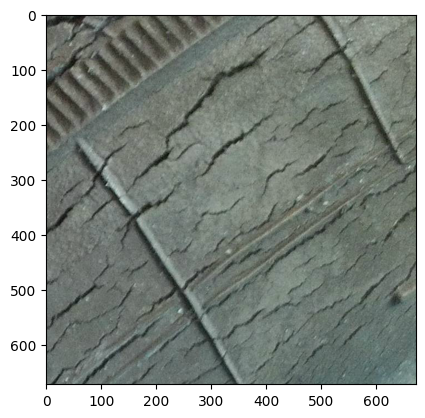

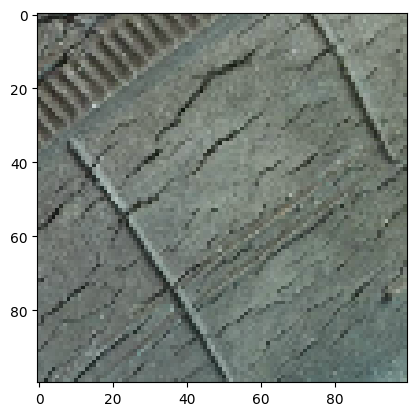

In [18]:
_path_folder = "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective"
_all_images = glob.glob(_path_folder+"/*.jpg")
img = cv2.imread(_all_images[50])
print(img.shape)
plt.imshow(img);
plt.figure()
plt.imshow(cv2.resize(img, (100,100), 0,0));

In [19]:
%mkdir -p "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [20]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [21]:
_path_folder_resized = "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

_max = len(glob.glob(_path_folder+"/*.jpg"))
out = display(progress(0, _max), display_id=True)
for ii,img_name in enumerate(glob.glob(_path_folder+"/*.jpg")):
  img = cv2.imread(img_name)
  img = cv2.resize(img, (96,96), 0,0)
  cv2.imwrite(os.path.join(_path_folder_resized,os.path.basename(img_name)), img)
  out.update(progress(ii, _max))

## Código estudiado

In [22]:
IMAGES_PATH = _path_folder_resized+"/*.jpg"

In [23]:
# importamos las librerías necesarias
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
# configuramos Colab para que nos muestre las imágenes más grandes
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [24]:
# definimos el discriminador
def define_discriminator(in_shape=(96,96,3)):
    model = Sequential(name="DISCRIMINATOR")
    # normal
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample (por el atributo 'strides')
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # clasificador
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compilamos modelo
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    return model

In [25]:
# definimos el generador
def define_generator(latent_dim):
    model = Sequential(name="GENERATOR")
    n_nodes = 256 * 12 * 12
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((12, 12, 256)))
    # upsample a 8x8
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample a 16x16
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample a 32x32
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # salida (nuestra imagen fake)
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
    model.summary()
    return model

In [26]:
# definimos el modelo GAN combinando generador y discriminador, para entrenar el generador
def define_gan(g_model, d_model):
    # Así que congelamos el discriminador:
    d_model.trainable = False
    # ahora conectamos el G(z) al D(x)
    model = Sequential()
    # añadimos el generador primero: él es el encargado de generar una muestra
    # a partir del espacio latente
    model.add(g_model)
    # y el discriminador después: le introducimos la muestra generada por el
    # G(z) para que nos diga si cree que es real o fake
    model.add(d_model)
    # y ahora sí, compilamos el modelo
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

In [27]:
def load_imgs(image_path=IMAGES_PATH):
    X_train = []
    for i in glob.glob(image_path):
        # img = Image.open(i)
        # img = np.asarray(img)
        img = cv2.imread(i)
        X_train.append(img)
    return np.asarray(X_train)

# definimos las funciones para cargar el MNIST
def load_real_samples():
    # cargamos el cifar10
    trainX = load_imgs()
    # convertimos a float32
    X = trainX.astype('float32')
    # escalamos entre -1 y 1 porque hemos puesto la función de activación
    # del generador tangente hiperbólica
    X = (X - 127.5) / 127.5
    return X

# nos creamos una función que nos devuelva n_samples del dataset con sus
# etiquetas (1)
def generate_real_samples(dataset, n_samples):
    # seleccionamos n_samples muestras aleatoriamente
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # las cogemos
    X = dataset[ix]
    # generamos las etiquetas reales (1)
    y = np.ones((n_samples, 1))
    return X, y

In [28]:
# generamos los vectores latentes que introduciremos al generador
def generate_latent_points(latent_dim, batch_size):
    # generamos un vector de batch_size * latent_dim números aleatorios
    # latent_dim es la dimensión del vector latente
    # batch_size es el número de elementos por batch
    x_input = np.random.randn(latent_dim * batch_size)
    # redimensionamos el vector para que tenga un tamaño (batch_size, latent_dim)
    x_input = x_input.reshape(batch_size, latent_dim)
    return x_input

# creamos datos fake con el generador (dinero falsificado)
def generate_fake_samples(g_model, latent_dim, n_samples):
    # usamos la función anterior para generar los vectores latentes que
    # necesitamos para generar muestras fake
    x_input = generate_latent_points(latent_dim, n_samples)
    # le introducimos los vectores latentes al generador para obtener
    # muestras similares a las reales
    X = g_model.predict(x_input)
    # le asignamos la etiqueta 0 (porque utilizaremos esta función para
    # entrenar el D)
    y = np.zeros((n_samples, 1))
    return X, y

In [29]:
# función para guardar las imágenes generadas
def save_plot(examples, epoch, n=7):
	# escalamos de [-1,1] (la salida de nuestra gan, debido a la función de activación tanh) a [0,1]
	examples = (examples + 1) / 2.0
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i])
	# guardamos las imágenes
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

In [30]:
# función para entrenar la GAN: el discriminador y el generador
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # bucle para las epochs
    for epoch in range(n_epochs):
        # bucle para los batch
        for batch in range(bat_per_epo):

            # en esta ocasión vamos a separar las pérdidas del discriminador
            # cuando le metemos imágenes reales y cuando le metemos imágenes
            # fake para ver cómo lo hace con cada tipo
            # recordad que lo ideal es que llegue a un 50% de acc en cada uno

            # preparamos los datos reales
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # actualizamos el discriminador
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)

            # generamos datos falsos
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # actualizamos el discriminador
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

            # preparamos los puntos en el espacio latente: serán la entrada al
            # modelo GAN con el que entrenaremos el generador
            X_gan = generate_latent_points(latent_dim, n_batch)

            # creamos etiquetas invertidas para el generador: utilizamos el D(x)
            # para que piense que las muestras que le introducimos son reales, y
            # en caso de que diga que no son reales, aprovechamos la información
            # de sus gradientes para actualizar el G(z) para que la próxima vez
            # los datos generados por G(z) sean más plausibles (parecidos a los
            # reales)
            y_gan = np.ones((n_batch, 1))

            # como acabamos de ver, entrenamos el generador de forma que actualice
            # sus pesos usando los gradientes del discriminador
            # tened en cuenta que en este modelo (gan_model) el discriminador está
            # congelado, por lo que no se actualizan sus pesos: no queremos "untar"
            # a nuestro policía, lo que queremos es fabricar dinero más realista.
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            # mostramos el progreso
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                  (epoch+1, batch+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (epoch+1) % 10 == 0 or epoch == 0:
            # preparamos ejemplos reales
            X_real, y_real = generate_real_samples(dataset, n_batch)
            # evaluamos el discriminador con datos reales
            _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
            # preparamos ejemplos fake
            x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
            # evaluamos el discriminador con datos fake
            _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
            # mostramos cómo de bueno es nuestro policía
            print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
            # guardamos las imágenes generadas
            save_plot(x_fake, epoch)
            # guardamos el generador para tenerlo disponible más tarde
            filename = 'generator_model_%03d.h5' % (epoch + 1)
            g_model.save(filename)

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=256)

Model: "DISCRIMINATOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 96, 96, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 48, 48, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 256)     

4/4 [==============================] - 0s 25ms/step
>2, 1/4, d1=0.133, d2=0.765 g=0.657
4/4 [==============================] - 0s 25ms/step
>2, 2/4, d1=0.056, d2=0.792 g=0.667
4/4 [==============================] - 0s 24ms/step
>2, 3/4, d1=0.038, d2=0.765 g=0.707
4/4 [==============================] - 0s 24ms/step
>2, 4/4, d1=0.041, d2=0.692 g=0.787
4/4 [==============================] - 0s 24ms/step
>3, 1/4, d1=0.040, d2=0.605 g=0.905
4/4 [==============================] - 0s 25ms/step
>3, 2/4, d1=0.061, d2=0.582 g=0.950
4/4 [==============================] - 0s 25ms/step
>3, 3/4, d1=0.043, d2=0.568 g=0.978
4/4 [==============================] - 0s 26ms/step
>3, 4/4, d1=0.071, d2=0.597 g=0.924
4/4 [==============================] - 0s 25ms/step
>4, 1/4, d1=0.034, d2=0.611 g=0.975
4/4 [==============================] - 0s 25ms/step
>4, 2/4, d1=0.087, d2=0.638 g=0.953
4/4 [==============================] - 0s 25ms/step
>4, 3/4, d1=0.013, d2=0.631 g=1.100
4/4 [===========================

4/4 [==============================] - 0s 25ms/step
>11, 1/4, d1=0.026, d2=0.019 g=5.903
4/4 [==============================] - 0s 25ms/step
>11, 2/4, d1=0.010, d2=0.203 g=6.895
4/4 [==============================] - 0s 25ms/step
>11, 3/4, d1=0.079, d2=0.338 g=7.686
4/4 [==============================] - 0s 25ms/step
>11, 4/4, d1=0.053, d2=0.021 g=6.986
4/4 [==============================] - 0s 25ms/step
>12, 1/4, d1=0.187, d2=1.254 g=9.151
4/4 [==============================] - 0s 25ms/step
>12, 2/4, d1=3.397, d2=0.367 g=1.874
4/4 [==============================] - 0s 25ms/step
>12, 3/4, d1=0.016, d2=0.877 g=1.648
4/4 [==============================] - 0s 25ms/step
>12, 4/4, d1=0.072, d2=0.570 g=1.768
4/4 [==============================] - 0s 25ms/step
>13, 1/4, d1=0.085, d2=0.475 g=1.773
4/4 [==============================] - 0s 26ms/step
>13, 2/4, d1=0.247, d2=0.380 g=1.841
4/4 [==============================] - 0s 26ms/step
>13, 3/4, d1=0.273, d2=0.403 g=1.915
4/4 [================

4/4 [==============================] - 0s 27ms/step
>21, 1/4, d1=0.740, d2=0.440 g=2.210
4/4 [==============================] - 0s 26ms/step
>21, 2/4, d1=0.610, d2=0.485 g=2.183
4/4 [==============================] - 0s 25ms/step
>21, 3/4, d1=0.509, d2=0.315 g=2.251
4/4 [==============================] - 0s 26ms/step
>21, 4/4, d1=0.490, d2=0.526 g=2.849
4/4 [==============================] - 0s 25ms/step
>22, 1/4, d1=0.440, d2=0.218 g=3.551
4/4 [==============================] - 0s 26ms/step
>22, 2/4, d1=0.269, d2=0.204 g=4.286
4/4 [==============================] - 0s 26ms/step
>22, 3/4, d1=0.265, d2=0.186 g=5.539
4/4 [==============================] - 0s 25ms/step
>22, 4/4, d1=0.226, d2=0.118 g=5.498
4/4 [==============================] - 0s 26ms/step
>23, 1/4, d1=0.188, d2=0.538 g=10.073
4/4 [==============================] - 0s 26ms/step
>23, 2/4, d1=1.344, d2=0.034 g=4.695
4/4 [==============================] - 0s 26ms/step
>23, 3/4, d1=0.178, d2=0.332 g=3.675
4/4 [===============

4/4 [==============================] - 0s 27ms/step
>31, 1/4, d1=0.559, d2=0.378 g=2.642
4/4 [==============================] - 0s 27ms/step
>31, 2/4, d1=0.483, d2=0.379 g=2.542
4/4 [==============================] - 0s 26ms/step
>31, 3/4, d1=0.587, d2=0.424 g=2.349
4/4 [==============================] - 0s 28ms/step
>31, 4/4, d1=0.567, d2=0.330 g=2.300
4/4 [==============================] - 0s 27ms/step
>32, 1/4, d1=0.514, d2=0.452 g=2.274
4/4 [==============================] - 0s 26ms/step
>32, 2/4, d1=0.439, d2=0.334 g=2.241
4/4 [==============================] - 0s 26ms/step
>32, 3/4, d1=0.543, d2=0.400 g=2.140
4/4 [==============================] - 0s 26ms/step
>32, 4/4, d1=0.506, d2=0.412 g=2.020
4/4 [==============================] - 0s 26ms/step
>33, 1/4, d1=0.437, d2=0.380 g=2.033
4/4 [==============================] - 0s 26ms/step
>33, 2/4, d1=0.333, d2=0.304 g=2.315
4/4 [==============================] - 0s 26ms/step
>33, 3/4, d1=0.347, d2=0.292 g=2.369
4/4 [================

4/4 [==============================] - 0s 26ms/step
>41, 1/4, d1=0.241, d2=0.144 g=3.019
4/4 [==============================] - 0s 27ms/step
>41, 2/4, d1=0.408, d2=0.228 g=2.472
4/4 [==============================] - 0s 27ms/step
>41, 3/4, d1=0.220, d2=0.172 g=3.132
4/4 [==============================] - 0s 26ms/step
>41, 4/4, d1=0.287, d2=0.132 g=3.049
4/4 [==============================] - 0s 27ms/step
>42, 1/4, d1=0.189, d2=0.122 g=3.184
4/4 [==============================] - 0s 26ms/step
>42, 2/4, d1=0.173, d2=0.115 g=3.126
4/4 [==============================] - 0s 27ms/step
>42, 3/4, d1=0.177, d2=0.123 g=3.218
4/4 [==============================] - 0s 27ms/step
>42, 4/4, d1=0.189, d2=0.106 g=3.163
4/4 [==============================] - 0s 27ms/step
>43, 1/4, d1=0.196, d2=0.155 g=3.041
4/4 [==============================] - 0s 27ms/step
>43, 2/4, d1=0.098, d2=0.091 g=3.471
4/4 [==============================] - 0s 27ms/step
>43, 3/4, d1=0.218, d2=0.159 g=2.992
4/4 [================

4/4 [==============================] - 0s 27ms/step
>51, 1/4, d1=0.451, d2=0.447 g=3.079
4/4 [==============================] - 0s 28ms/step
>51, 2/4, d1=0.477, d2=0.195 g=2.843
4/4 [==============================] - 0s 27ms/step
>51, 3/4, d1=0.292, d2=0.599 g=3.985
4/4 [==============================] - 0s 27ms/step
>51, 4/4, d1=0.533, d2=0.156 g=2.955
4/4 [==============================] - 0s 27ms/step
>52, 1/4, d1=0.400, d2=0.475 g=3.196
4/4 [==============================] - 0s 26ms/step
>52, 2/4, d1=0.587, d2=0.330 g=2.966
4/4 [==============================] - 0s 26ms/step
>52, 3/4, d1=0.412, d2=0.286 g=2.648
4/4 [==============================] - 0s 26ms/step
>52, 4/4, d1=0.331, d2=0.383 g=2.720
4/4 [==============================] - 0s 27ms/step
>53, 1/4, d1=0.425, d2=0.312 g=2.473
4/4 [==============================] - 0s 26ms/step
>53, 2/4, d1=0.471, d2=0.717 g=2.756
4/4 [==============================] - 0s 27ms/step
>53, 3/4, d1=0.590, d2=0.198 g=2.465
4/4 [================

4/4 [==============================] - 0s 27ms/step
>61, 1/4, d1=0.541, d2=0.327 g=3.299
4/4 [==============================] - 0s 26ms/step
>61, 2/4, d1=0.277, d2=0.297 g=3.667
4/4 [==============================] - 0s 26ms/step
>61, 3/4, d1=0.425, d2=0.229 g=3.207
4/4 [==============================] - 0s 26ms/step
>61, 4/4, d1=0.407, d2=0.390 g=4.398
4/4 [==============================] - 0s 27ms/step
>62, 1/4, d1=0.690, d2=0.260 g=3.447
4/4 [==============================] - 0s 28ms/step
>62, 2/4, d1=0.310, d2=0.205 g=3.372
4/4 [==============================] - 0s 27ms/step
>62, 3/4, d1=0.297, d2=0.250 g=3.609
4/4 [==============================] - 0s 27ms/step
>62, 4/4, d1=0.464, d2=0.265 g=2.874
4/4 [==============================] - 0s 26ms/step
>63, 1/4, d1=0.479, d2=0.613 g=2.874
4/4 [==============================] - 0s 27ms/step
>63, 2/4, d1=0.591, d2=0.373 g=2.364
4/4 [==============================] - 0s 27ms/step
>63, 3/4, d1=0.558, d2=0.656 g=2.047
4/4 [================

4/4 [==============================] - 0s 27ms/step
>71, 1/4, d1=0.175, d2=0.129 g=3.459
4/4 [==============================] - 0s 26ms/step
>71, 2/4, d1=0.177, d2=0.176 g=3.823
4/4 [==============================] - 0s 26ms/step
>71, 3/4, d1=0.338, d2=0.261 g=4.136
4/4 [==============================] - 0s 26ms/step
>71, 4/4, d1=0.306, d2=0.097 g=3.095
4/4 [==============================] - 0s 26ms/step
>72, 1/4, d1=0.342, d2=0.783 g=3.894
4/4 [==============================] - 0s 26ms/step
>72, 2/4, d1=0.829, d2=0.075 g=2.949
4/4 [==============================] - 0s 27ms/step
>72, 3/4, d1=0.521, d2=0.183 g=2.183
4/4 [==============================] - 0s 27ms/step
>72, 4/4, d1=0.466, d2=0.275 g=1.935
4/4 [==============================] - 0s 27ms/step
>73, 1/4, d1=0.238, d2=0.285 g=1.872
4/4 [==============================] - 0s 26ms/step
>73, 2/4, d1=0.231, d2=0.356 g=1.919
4/4 [==============================] - 0s 27ms/step
>73, 3/4, d1=0.206, d2=0.336 g=1.997
4/4 [================

4/4 [==============================] - 0s 26ms/step
>81, 1/4, d1=0.534, d2=0.443 g=2.075
4/4 [==============================] - 0s 26ms/step
>81, 2/4, d1=0.580, d2=0.462 g=2.095
4/4 [==============================] - 0s 26ms/step
>81, 3/4, d1=0.504, d2=0.359 g=2.165
4/4 [==============================] - 0s 26ms/step
>81, 4/4, d1=0.462, d2=0.400 g=2.470
4/4 [==============================] - 0s 27ms/step
>82, 1/4, d1=0.455, d2=0.269 g=2.562
4/4 [==============================] - 0s 26ms/step
>82, 2/4, d1=0.385, d2=0.239 g=2.669
4/4 [==============================] - 0s 27ms/step
>82, 3/4, d1=0.311, d2=0.310 g=2.553
4/4 [==============================] - 0s 27ms/step
>82, 4/4, d1=0.307, d2=0.279 g=2.899
4/4 [==============================] - 0s 26ms/step
>83, 1/4, d1=0.419, d2=0.251 g=2.553
4/4 [==============================] - 0s 27ms/step
>83, 2/4, d1=0.380, d2=0.350 g=2.376
4/4 [==============================] - 0s 26ms/step
>83, 3/4, d1=0.308, d2=0.291 g=2.653
4/4 [================

4/4 [==============================] - 0s 27ms/step
>91, 1/4, d1=0.281, d2=0.259 g=2.833
4/4 [==============================] - 0s 28ms/step
>91, 2/4, d1=0.350, d2=0.251 g=2.708
4/4 [==============================] - 0s 26ms/step
>91, 3/4, d1=0.420, d2=0.383 g=2.733
4/4 [==============================] - 0s 27ms/step
>91, 4/4, d1=0.326, d2=0.286 g=2.861
4/4 [==============================] - 0s 27ms/step
>92, 1/4, d1=0.452, d2=0.432 g=2.476
4/4 [==============================] - 0s 26ms/step
>92, 2/4, d1=0.440, d2=0.843 g=3.063
4/4 [==============================] - 0s 26ms/step
>92, 3/4, d1=0.846, d2=0.922 g=3.129
4/4 [==============================] - 0s 26ms/step
>92, 4/4, d1=0.780, d2=0.775 g=3.327
4/4 [==============================] - 0s 27ms/step
>93, 1/4, d1=0.794, d2=0.464 g=2.683
4/4 [==============================] - 0s 27ms/step
>93, 2/4, d1=0.514, d2=0.611 g=3.877
4/4 [==============================] - 0s 27ms/step
>93, 3/4, d1=0.695, d2=0.111 g=3.496
4/4 [================

4/4 [==============================] - 0s 27ms/step
>101, 1/4, d1=0.773, d2=0.679 g=2.080
4/4 [==============================] - 0s 26ms/step
>101, 2/4, d1=0.730, d2=0.648 g=2.222
4/4 [==============================] - 0s 26ms/step
>101, 3/4, d1=0.512, d2=0.307 g=2.375
4/4 [==============================] - 0s 26ms/step
>101, 4/4, d1=0.627, d2=0.400 g=2.417
4/4 [==============================] - 0s 27ms/step
>102, 1/4, d1=0.583, d2=0.395 g=2.423
4/4 [==============================] - 0s 27ms/step
>102, 2/4, d1=0.593, d2=0.399 g=2.475
4/4 [==============================] - 0s 28ms/step
>102, 3/4, d1=0.447, d2=0.456 g=2.859
4/4 [==============================] - 0s 26ms/step
>102, 4/4, d1=0.516, d2=0.398 g=3.179
4/4 [==============================] - 0s 26ms/step
>103, 1/4, d1=0.596, d2=0.290 g=3.676
4/4 [==============================] - 0s 26ms/step
>103, 2/4, d1=0.425, d2=0.141 g=3.682
4/4 [==============================] - 0s 26ms/step
>103, 3/4, d1=0.341, d2=0.249 g=3.965
4/4 [=====

4/4 [==============================] - 0s 28ms/step
>111, 1/4, d1=0.423, d2=0.272 g=2.468
4/4 [==============================] - 0s 27ms/step
>111, 2/4, d1=0.447, d2=0.311 g=2.368
4/4 [==============================] - 0s 26ms/step
>111, 3/4, d1=0.298, d2=0.241 g=2.455
4/4 [==============================] - 0s 27ms/step
>111, 4/4, d1=0.359, d2=0.260 g=2.394
4/4 [==============================] - 0s 26ms/step
>112, 1/4, d1=0.370, d2=0.309 g=2.283
4/4 [==============================] - 0s 27ms/step
>112, 2/4, d1=0.348, d2=0.312 g=2.125
4/4 [==============================] - 0s 27ms/step
>112, 3/4, d1=0.365, d2=0.350 g=2.063
4/4 [==============================] - 0s 26ms/step
>112, 4/4, d1=0.429, d2=0.362 g=1.805
4/4 [==============================] - 0s 27ms/step
>113, 1/4, d1=0.324, d2=0.340 g=1.795
4/4 [==============================] - 0s 26ms/step
>113, 2/4, d1=0.305, d2=0.361 g=1.805
4/4 [==============================] - 0s 26ms/step
>113, 3/4, d1=0.269, d2=0.347 g=1.934
4/4 [=====

4/4 [==============================] - 0s 29ms/step
>121, 1/4, d1=0.349, d2=0.333 g=2.292
4/4 [==============================] - 0s 27ms/step
>121, 2/4, d1=0.474, d2=0.347 g=2.230
4/4 [==============================] - 0s 26ms/step
>121, 3/4, d1=0.341, d2=0.265 g=2.230
4/4 [==============================] - 0s 26ms/step
>121, 4/4, d1=0.337, d2=0.293 g=2.302
4/4 [==============================] - 0s 27ms/step
>122, 1/4, d1=0.437, d2=0.353 g=2.429
4/4 [==============================] - 0s 27ms/step
>122, 2/4, d1=0.313, d2=0.252 g=2.563
4/4 [==============================] - 0s 26ms/step
>122, 3/4, d1=0.373, d2=0.287 g=2.393
4/4 [==============================] - 0s 26ms/step
>122, 4/4, d1=0.385, d2=0.336 g=2.298
4/4 [==============================] - 0s 26ms/step
>123, 1/4, d1=0.406, d2=0.417 g=2.176
4/4 [==============================] - 0s 27ms/step
>123, 2/4, d1=0.439, d2=0.502 g=2.232
4/4 [==============================] - 0s 27ms/step
>123, 3/4, d1=0.592, d2=0.783 g=2.356
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>131, 1/4, d1=0.457, d2=0.374 g=1.962
4/4 [==============================] - 0s 27ms/step
>131, 2/4, d1=0.404, d2=0.321 g=2.114
4/4 [==============================] - 0s 27ms/step
>131, 3/4, d1=0.477, d2=0.414 g=2.144
4/4 [==============================] - 0s 26ms/step
>131, 4/4, d1=0.513, d2=0.370 g=2.116
4/4 [==============================] - 0s 26ms/step
>132, 1/4, d1=0.414, d2=0.374 g=2.135
4/4 [==============================] - 0s 26ms/step
>132, 2/4, d1=0.456, d2=0.348 g=2.179
4/4 [==============================] - 0s 26ms/step
>132, 3/4, d1=0.469, d2=0.430 g=2.035
4/4 [==============================] - 0s 26ms/step
>132, 4/4, d1=0.440, d2=0.354 g=2.153
4/4 [==============================] - 0s 27ms/step
>133, 1/4, d1=0.371, d2=0.342 g=2.291
4/4 [==============================] - 0s 27ms/step
>133, 2/4, d1=0.445, d2=0.310 g=2.080
4/4 [==============================] - 0s 27ms/step
>133, 3/4, d1=0.447, d2=0.432 g=2.153
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>141, 1/4, d1=0.437, d2=0.374 g=2.530
4/4 [==============================] - 0s 27ms/step
>141, 2/4, d1=0.447, d2=0.362 g=2.349
4/4 [==============================] - 0s 26ms/step
>141, 3/4, d1=0.405, d2=0.405 g=2.518
4/4 [==============================] - 0s 26ms/step
>141, 4/4, d1=0.631, d2=0.568 g=2.339
4/4 [==============================] - 0s 27ms/step
>142, 1/4, d1=0.435, d2=0.427 g=2.654
4/4 [==============================] - 0s 28ms/step
>142, 2/4, d1=0.731, d2=0.515 g=2.637
4/4 [==============================] - 0s 27ms/step
>142, 3/4, d1=0.580, d2=0.328 g=2.606
4/4 [==============================] - 0s 26ms/step
>142, 4/4, d1=0.493, d2=0.380 g=2.763
4/4 [==============================] - 0s 26ms/step
>143, 1/4, d1=0.500, d2=0.309 g=2.809
4/4 [==============================] - 0s 27ms/step
>143, 2/4, d1=0.433, d2=0.302 g=2.759
4/4 [==============================] - 0s 27ms/step
>143, 3/4, d1=0.450, d2=0.471 g=3.199
4/4 [=====

4/4 [==============================] - 0s 31ms/step
>151, 1/4, d1=0.551, d2=0.527 g=2.915
4/4 [==============================] - 0s 27ms/step
>151, 2/4, d1=0.526, d2=0.454 g=3.123
4/4 [==============================] - 0s 26ms/step
>151, 3/4, d1=0.595, d2=0.447 g=3.053
4/4 [==============================] - 0s 27ms/step
>151, 4/4, d1=0.464, d2=0.365 g=2.991
4/4 [==============================] - 0s 26ms/step
>152, 1/4, d1=0.638, d2=0.405 g=3.349
4/4 [==============================] - 0s 26ms/step
>152, 2/4, d1=0.401, d2=0.165 g=3.221
4/4 [==============================] - 0s 27ms/step
>152, 3/4, d1=0.364, d2=0.292 g=2.791
4/4 [==============================] - 0s 26ms/step
>152, 4/4, d1=0.336, d2=0.357 g=2.614
4/4 [==============================] - 0s 26ms/step
>153, 1/4, d1=0.301, d2=0.439 g=2.537
4/4 [==============================] - 0s 27ms/step
>153, 2/4, d1=0.585, d2=0.633 g=2.116
4/4 [==============================] - 0s 27ms/step
>153, 3/4, d1=0.748, d2=0.724 g=1.554
4/4 [=====

4/4 [==============================] - 0s 28ms/step
>161, 1/4, d1=0.593, d2=0.339 g=2.838
4/4 [==============================] - 0s 27ms/step
>161, 2/4, d1=0.595, d2=0.440 g=2.833
4/4 [==============================] - 0s 27ms/step
>161, 3/4, d1=0.496, d2=0.370 g=2.885
4/4 [==============================] - 0s 27ms/step
>161, 4/4, d1=0.470, d2=0.448 g=2.945
4/4 [==============================] - 0s 26ms/step
>162, 1/4, d1=0.604, d2=0.327 g=2.691
4/4 [==============================] - 0s 26ms/step
>162, 2/4, d1=0.503, d2=0.310 g=2.499
4/4 [==============================] - 0s 27ms/step
>162, 3/4, d1=0.392, d2=0.357 g=2.321
4/4 [==============================] - 0s 27ms/step
>162, 4/4, d1=0.424, d2=0.414 g=2.135
4/4 [==============================] - 0s 27ms/step
>163, 1/4, d1=0.399, d2=0.414 g=2.147
4/4 [==============================] - 0s 27ms/step
>163, 2/4, d1=0.326, d2=0.305 g=2.316
4/4 [==============================] - 0s 26ms/step
>163, 3/4, d1=0.399, d2=0.312 g=2.187
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>171, 1/4, d1=0.496, d2=0.416 g=2.528
4/4 [==============================] - 0s 26ms/step
>171, 2/4, d1=0.594, d2=0.652 g=2.322
4/4 [==============================] - 0s 26ms/step
>171, 3/4, d1=0.590, d2=0.495 g=2.372
4/4 [==============================] - 0s 26ms/step
>171, 4/4, d1=0.585, d2=0.462 g=2.065
4/4 [==============================] - 0s 26ms/step
>172, 1/4, d1=0.505, d2=0.527 g=1.989
4/4 [==============================] - 0s 26ms/step
>172, 2/4, d1=0.487, d2=0.500 g=2.094
4/4 [==============================] - 0s 27ms/step
>172, 3/4, d1=0.507, d2=0.475 g=2.381
4/4 [==============================] - 0s 26ms/step
>172, 4/4, d1=0.459, d2=0.419 g=2.609
4/4 [==============================] - 0s 27ms/step
>173, 1/4, d1=0.540, d2=0.321 g=2.506
4/4 [==============================] - 0s 26ms/step
>173, 2/4, d1=0.426, d2=0.472 g=2.993
4/4 [==============================] - 0s 26ms/step
>173, 3/4, d1=0.577, d2=0.387 g=3.179
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>181, 1/4, d1=0.430, d2=0.264 g=3.182
4/4 [==============================] - 0s 28ms/step
>181, 2/4, d1=0.424, d2=0.447 g=3.608
4/4 [==============================] - 0s 27ms/step
>181, 3/4, d1=0.491, d2=0.279 g=3.210
4/4 [==============================] - 0s 26ms/step
>181, 4/4, d1=0.584, d2=0.570 g=2.937
4/4 [==============================] - 0s 27ms/step
>182, 1/4, d1=0.598, d2=0.431 g=2.935
4/4 [==============================] - 0s 26ms/step
>182, 2/4, d1=0.477, d2=0.373 g=2.987
4/4 [==============================] - 0s 27ms/step
>182, 3/4, d1=0.472, d2=0.358 g=2.912
4/4 [==============================] - 0s 26ms/step
>182, 4/4, d1=0.386, d2=0.447 g=3.236
4/4 [==============================] - 0s 27ms/step
>183, 1/4, d1=0.454, d2=0.275 g=3.234
4/4 [==============================] - 0s 27ms/step
>183, 2/4, d1=0.540, d2=0.465 g=3.342
4/4 [==============================] - 0s 26ms/step
>183, 3/4, d1=0.420, d2=0.279 g=3.365
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>191, 1/4, d1=0.413, d2=0.276 g=2.633
4/4 [==============================] - 0s 28ms/step
>191, 2/4, d1=0.505, d2=0.353 g=2.495
4/4 [==============================] - 0s 26ms/step
>191, 3/4, d1=0.439, d2=0.386 g=2.864
4/4 [==============================] - 0s 27ms/step
>191, 4/4, d1=0.451, d2=0.278 g=2.707
4/4 [==============================] - 0s 27ms/step
>192, 1/4, d1=0.420, d2=0.425 g=2.688
4/4 [==============================] - 0s 26ms/step
>192, 2/4, d1=0.495, d2=0.326 g=2.504
4/4 [==============================] - 0s 26ms/step
>192, 3/4, d1=0.493, d2=0.380 g=2.421
4/4 [==============================] - 0s 26ms/step
>192, 4/4, d1=0.419, d2=0.359 g=2.516
4/4 [==============================] - 0s 27ms/step
>193, 1/4, d1=0.407, d2=0.337 g=2.372
4/4 [==============================] - 0s 27ms/step
>193, 2/4, d1=0.494, d2=0.336 g=2.253
4/4 [==============================] - 0s 27ms/step
>193, 3/4, d1=0.473, d2=0.390 g=2.509
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>201, 1/4, d1=0.539, d2=0.576 g=2.774
4/4 [==============================] - 0s 26ms/step
>201, 2/4, d1=0.427, d2=0.391 g=2.649
4/4 [==============================] - 0s 26ms/step
>201, 3/4, d1=0.637, d2=0.709 g=2.771
4/4 [==============================] - 0s 26ms/step
>201, 4/4, d1=0.495, d2=0.498 g=2.821
4/4 [==============================] - 0s 26ms/step
>202, 1/4, d1=0.503, d2=0.420 g=2.947
4/4 [==============================] - 0s 27ms/step
>202, 2/4, d1=0.518, d2=0.362 g=3.151
4/4 [==============================] - 0s 27ms/step
>202, 3/4, d1=0.446, d2=0.207 g=2.875
4/4 [==============================] - 0s 27ms/step
>202, 4/4, d1=0.413, d2=0.458 g=3.533
4/4 [==============================] - 0s 27ms/step
>203, 1/4, d1=0.326, d2=0.103 g=3.252
4/4 [==============================] - 0s 27ms/step
>203, 2/4, d1=0.266, d2=0.298 g=2.517
4/4 [==============================] - 0s 29ms/step
>203, 3/4, d1=0.264, d2=0.421 g=2.771
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>211, 1/4, d1=0.824, d2=0.306 g=3.572
4/4 [==============================] - 0s 27ms/step
>211, 2/4, d1=0.588, d2=0.198 g=3.175
4/4 [==============================] - 0s 27ms/step
>211, 3/4, d1=0.410, d2=0.360 g=3.168
4/4 [==============================] - 0s 26ms/step
>211, 4/4, d1=0.448, d2=0.271 g=3.078
4/4 [==============================] - 0s 26ms/step
>212, 1/4, d1=0.375, d2=0.287 g=2.734
4/4 [==============================] - 0s 27ms/step
>212, 2/4, d1=0.402, d2=0.377 g=3.037
4/4 [==============================] - 0s 26ms/step
>212, 3/4, d1=0.577, d2=0.280 g=2.471
4/4 [==============================] - 0s 27ms/step
>212, 4/4, d1=0.335, d2=0.396 g=2.422
4/4 [==============================] - 0s 27ms/step
>213, 1/4, d1=0.327, d2=0.316 g=2.523
4/4 [==============================] - 0s 27ms/step
>213, 2/4, d1=0.405, d2=0.363 g=2.512
4/4 [==============================] - 0s 27ms/step
>213, 3/4, d1=0.299, d2=0.267 g=2.479
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>221, 1/4, d1=0.187, d2=0.207 g=2.794
4/4 [==============================] - 0s 27ms/step
>221, 2/4, d1=0.267, d2=0.338 g=2.702
4/4 [==============================] - 0s 27ms/step
>221, 3/4, d1=0.249, d2=0.263 g=2.752
4/4 [==============================] - 0s 26ms/step
>221, 4/4, d1=0.339, d2=0.359 g=2.542
4/4 [==============================] - 0s 26ms/step
>222, 1/4, d1=0.406, d2=0.375 g=2.416
4/4 [==============================] - 0s 27ms/step
>222, 2/4, d1=0.297, d2=0.423 g=2.753
4/4 [==============================] - 0s 27ms/step
>222, 3/4, d1=0.451, d2=0.218 g=2.704
4/4 [==============================] - 0s 26ms/step
>222, 4/4, d1=0.322, d2=0.296 g=3.012
4/4 [==============================] - 0s 26ms/step
>223, 1/4, d1=0.377, d2=0.206 g=3.136
4/4 [==============================] - 0s 26ms/step
>223, 2/4, d1=0.282, d2=0.182 g=3.213
4/4 [==============================] - 0s 26ms/step
>223, 3/4, d1=0.259, d2=0.186 g=3.220
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>231, 1/4, d1=0.521, d2=0.337 g=2.628
4/4 [==============================] - 0s 28ms/step
>231, 2/4, d1=0.433, d2=0.365 g=2.720
4/4 [==============================] - 0s 26ms/step
>231, 3/4, d1=0.372, d2=0.366 g=2.954
4/4 [==============================] - 0s 27ms/step
>231, 4/4, d1=0.479, d2=0.306 g=2.543
4/4 [==============================] - 0s 26ms/step
>232, 1/4, d1=0.531, d2=0.579 g=2.174
4/4 [==============================] - 0s 26ms/step
>232, 2/4, d1=0.436, d2=0.371 g=2.395
4/4 [==============================] - 0s 26ms/step
>232, 3/4, d1=0.611, d2=0.374 g=2.043
4/4 [==============================] - 0s 27ms/step
>232, 4/4, d1=0.461, d2=0.443 g=2.278
4/4 [==============================] - 0s 27ms/step
>233, 1/4, d1=0.449, d2=0.264 g=2.277
4/4 [==============================] - 0s 27ms/step
>233, 2/4, d1=0.494, d2=0.336 g=2.151
4/4 [==============================] - 0s 27ms/step
>233, 3/4, d1=0.446, d2=0.414 g=2.333
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>241, 1/4, d1=0.416, d2=0.255 g=3.110
4/4 [==============================] - 0s 26ms/step
>241, 2/4, d1=0.475, d2=0.675 g=3.439
4/4 [==============================] - 0s 27ms/step
>241, 3/4, d1=0.667, d2=0.396 g=3.052
4/4 [==============================] - 0s 27ms/step
>241, 4/4, d1=0.459, d2=0.571 g=3.179
4/4 [==============================] - 0s 26ms/step
>242, 1/4, d1=0.507, d2=0.457 g=3.179
4/4 [==============================] - 0s 27ms/step
>242, 2/4, d1=0.682, d2=0.614 g=2.987
4/4 [==============================] - 0s 27ms/step
>242, 3/4, d1=0.530, d2=0.401 g=3.080
4/4 [==============================] - 0s 28ms/step
>242, 4/4, d1=0.604, d2=0.410 g=2.981
4/4 [==============================] - 0s 27ms/step
>243, 1/4, d1=0.489, d2=0.373 g=3.142
4/4 [==============================] - 0s 27ms/step
>243, 2/4, d1=0.453, d2=0.252 g=2.978
4/4 [==============================] - 0s 27ms/step
>243, 3/4, d1=0.548, d2=0.367 g=2.741
4/4 [=====

4/4 [==============================] - 0s 28ms/step
>251, 1/4, d1=0.442, d2=0.272 g=3.408
4/4 [==============================] - 0s 27ms/step
>251, 2/4, d1=0.481, d2=0.425 g=3.258
4/4 [==============================] - 0s 27ms/step
>251, 3/4, d1=0.414, d2=0.251 g=2.896
4/4 [==============================] - 0s 26ms/step
>251, 4/4, d1=0.468, d2=0.363 g=2.578
4/4 [==============================] - 0s 26ms/step
>252, 1/4, d1=0.292, d2=0.324 g=2.575
4/4 [==============================] - 0s 26ms/step
>252, 2/4, d1=0.474, d2=0.554 g=2.652
4/4 [==============================] - 0s 26ms/step
>252, 3/4, d1=0.502, d2=0.385 g=2.564
4/4 [==============================] - 0s 26ms/step
>252, 4/4, d1=0.518, d2=0.486 g=2.638
4/4 [==============================] - 0s 27ms/step
>253, 1/4, d1=0.524, d2=0.451 g=2.977
4/4 [==============================] - 0s 27ms/step
>253, 2/4, d1=0.762, d2=0.416 g=2.975
4/4 [==============================] - 0s 26ms/step
>253, 3/4, d1=0.435, d2=0.427 g=3.149
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>261, 1/4, d1=0.389, d2=0.374 g=2.294
4/4 [==============================] - 0s 27ms/step
>261, 2/4, d1=0.398, d2=0.361 g=2.198
4/4 [==============================] - 0s 26ms/step
>261, 3/4, d1=0.370, d2=0.393 g=2.283
4/4 [==============================] - 0s 26ms/step
>261, 4/4, d1=0.480, d2=0.468 g=2.460
4/4 [==============================] - 0s 27ms/step
>262, 1/4, d1=0.493, d2=0.345 g=2.189
4/4 [==============================] - 0s 27ms/step
>262, 2/4, d1=0.343, d2=0.363 g=2.385
4/4 [==============================] - 0s 27ms/step
>262, 3/4, d1=0.479, d2=0.370 g=2.402
4/4 [==============================] - 0s 27ms/step
>262, 4/4, d1=0.377, d2=0.378 g=2.841
4/4 [==============================] - 0s 26ms/step
>263, 1/4, d1=0.510, d2=0.283 g=2.500
4/4 [==============================] - 0s 26ms/step
>263, 2/4, d1=0.364, d2=0.393 g=2.595
4/4 [==============================] - 0s 27ms/step
>263, 3/4, d1=0.401, d2=0.357 g=2.657
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>271, 1/4, d1=0.448, d2=0.225 g=2.609
4/4 [==============================] - 0s 26ms/step
>271, 2/4, d1=0.433, d2=0.262 g=2.516
4/4 [==============================] - 0s 26ms/step
>271, 3/4, d1=0.364, d2=0.245 g=2.538
4/4 [==============================] - 0s 26ms/step
>271, 4/4, d1=0.336, d2=0.230 g=2.610
4/4 [==============================] - 0s 25ms/step
>272, 1/4, d1=0.300, d2=0.250 g=2.521
4/4 [==============================] - 0s 26ms/step
>272, 2/4, d1=0.266, d2=0.233 g=2.537
4/4 [==============================] - 0s 27ms/step
>272, 3/4, d1=0.314, d2=0.241 g=2.466
4/4 [==============================] - 0s 26ms/step
>272, 4/4, d1=0.270, d2=0.291 g=2.512
4/4 [==============================] - 0s 27ms/step
>273, 1/4, d1=0.346, d2=0.239 g=2.516
4/4 [==============================] - 0s 27ms/step
>273, 2/4, d1=0.339, d2=0.321 g=2.592
4/4 [==============================] - 0s 27ms/step
>273, 3/4, d1=0.328, d2=0.304 g=2.869
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>281, 1/4, d1=0.742, d2=0.512 g=2.288
4/4 [==============================] - 0s 26ms/step
>281, 2/4, d1=0.656, d2=0.524 g=2.699
4/4 [==============================] - 0s 27ms/step
>281, 3/4, d1=0.501, d2=0.225 g=2.801
4/4 [==============================] - 0s 27ms/step
>281, 4/4, d1=0.319, d2=0.226 g=2.820
4/4 [==============================] - 0s 26ms/step
>282, 1/4, d1=0.328, d2=0.274 g=2.588
4/4 [==============================] - 0s 26ms/step
>282, 2/4, d1=0.282, d2=0.286 g=2.956
4/4 [==============================] - 0s 27ms/step
>282, 3/4, d1=0.326, d2=0.198 g=2.823
4/4 [==============================] - 0s 27ms/step
>282, 4/4, d1=0.283, d2=0.251 g=2.732
4/4 [==============================] - 0s 27ms/step
>283, 1/4, d1=0.334, d2=0.304 g=2.638
4/4 [==============================] - 0s 26ms/step
>283, 2/4, d1=0.343, d2=0.344 g=2.808
4/4 [==============================] - 0s 27ms/step
>283, 3/4, d1=0.444, d2=0.282 g=2.599
4/4 [=====

4/4 [==============================] - 0s 34ms/step
>291, 1/4, d1=0.422, d2=0.293 g=2.499
4/4 [==============================] - 0s 26ms/step
>291, 2/4, d1=0.406, d2=0.382 g=2.242
4/4 [==============================] - 0s 26ms/step
>291, 3/4, d1=0.371, d2=0.346 g=2.668
4/4 [==============================] - 0s 26ms/step
>291, 4/4, d1=0.546, d2=0.331 g=2.368
4/4 [==============================] - 0s 27ms/step
>292, 1/4, d1=0.455, d2=0.364 g=2.488
4/4 [==============================] - 0s 26ms/step
>292, 2/4, d1=0.423, d2=0.283 g=2.496
4/4 [==============================] - 0s 26ms/step
>292, 3/4, d1=0.499, d2=0.330 g=2.719
4/4 [==============================] - 0s 26ms/step
>292, 4/4, d1=0.518, d2=0.301 g=2.588
4/4 [==============================] - 0s 27ms/step
>293, 1/4, d1=0.400, d2=0.272 g=2.928
4/4 [==============================] - 0s 26ms/step
>293, 2/4, d1=0.478, d2=0.255 g=2.934
4/4 [==============================] - 0s 26ms/step
>293, 3/4, d1=0.389, d2=0.283 g=2.857
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>301, 1/4, d1=0.432, d2=0.340 g=2.926
4/4 [==============================] - 0s 27ms/step
>301, 2/4, d1=0.436, d2=0.451 g=3.017
4/4 [==============================] - 0s 26ms/step
>301, 3/4, d1=0.469, d2=0.381 g=3.011
4/4 [==============================] - 0s 27ms/step
>301, 4/4, d1=0.603, d2=0.414 g=2.938
4/4 [==============================] - 0s 27ms/step
>302, 1/4, d1=0.474, d2=0.284 g=2.771
4/4 [==============================] - 0s 26ms/step
>302, 2/4, d1=0.337, d2=0.311 g=2.817
4/4 [==============================] - 0s 27ms/step
>302, 3/4, d1=0.464, d2=0.240 g=2.882
4/4 [==============================] - 0s 28ms/step
>302, 4/4, d1=0.519, d2=0.286 g=2.777
4/4 [==============================] - 0s 26ms/step
>303, 1/4, d1=0.366, d2=0.228 g=2.842
4/4 [==============================] - 0s 26ms/step
>303, 2/4, d1=0.405, d2=0.258 g=2.670
4/4 [==============================] - 0s 27ms/step
>303, 3/4, d1=0.338, d2=0.417 g=2.723
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>311, 1/4, d1=0.470, d2=0.415 g=2.303
4/4 [==============================] - 0s 27ms/step
>311, 2/4, d1=0.486, d2=0.411 g=2.376
4/4 [==============================] - 0s 27ms/step
>311, 3/4, d1=0.469, d2=0.375 g=2.661
4/4 [==============================] - 0s 27ms/step
>311, 4/4, d1=0.456, d2=0.253 g=2.486
4/4 [==============================] - 0s 27ms/step
>312, 1/4, d1=0.401, d2=0.354 g=2.538
4/4 [==============================] - 0s 26ms/step
>312, 2/4, d1=0.383, d2=0.298 g=2.748
4/4 [==============================] - 0s 27ms/step
>312, 3/4, d1=0.353, d2=0.274 g=2.933
4/4 [==============================] - 0s 27ms/step
>312, 4/4, d1=0.437, d2=0.323 g=2.994
4/4 [==============================] - 0s 26ms/step
>313, 1/4, d1=0.377, d2=0.358 g=3.044
4/4 [==============================] - 0s 27ms/step
>313, 2/4, d1=0.450, d2=0.277 g=2.739
4/4 [==============================] - 0s 27ms/step
>313, 3/4, d1=0.315, d2=0.325 g=2.546
4/4 [=====

4/4 [==============================] - 0s 28ms/step
>321, 1/4, d1=0.576, d2=0.274 g=2.974
4/4 [==============================] - 0s 27ms/step
>321, 2/4, d1=0.444, d2=0.334 g=3.120
4/4 [==============================] - 0s 27ms/step
>321, 3/4, d1=0.425, d2=0.286 g=3.075
4/4 [==============================] - 0s 26ms/step
>321, 4/4, d1=0.523, d2=0.433 g=3.005
4/4 [==============================] - 0s 26ms/step
>322, 1/4, d1=0.531, d2=0.531 g=3.439
4/4 [==============================] - 0s 27ms/step
>322, 2/4, d1=0.634, d2=0.443 g=3.075
4/4 [==============================] - 0s 28ms/step
>322, 3/4, d1=0.540, d2=0.381 g=3.014
4/4 [==============================] - 0s 27ms/step
>322, 4/4, d1=0.528, d2=0.305 g=2.773
4/4 [==============================] - 0s 26ms/step
>323, 1/4, d1=0.621, d2=0.665 g=3.183
4/4 [==============================] - 0s 27ms/step
>323, 2/4, d1=0.732, d2=0.293 g=2.701
4/4 [==============================] - 0s 26ms/step
>323, 3/4, d1=0.466, d2=0.380 g=3.017
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>331, 1/4, d1=0.320, d2=0.287 g=2.378
4/4 [==============================] - 0s 26ms/step
>331, 2/4, d1=0.366, d2=0.387 g=2.275
4/4 [==============================] - 0s 26ms/step
>331, 3/4, d1=0.321, d2=0.468 g=2.423
4/4 [==============================] - 0s 26ms/step
>331, 4/4, d1=0.378, d2=0.351 g=2.228
4/4 [==============================] - 0s 26ms/step
>332, 1/4, d1=0.468, d2=0.510 g=2.094
4/4 [==============================] - 0s 26ms/step
>332, 2/4, d1=0.434, d2=0.506 g=2.320
4/4 [==============================] - 0s 27ms/step
>332, 3/4, d1=0.494, d2=0.435 g=2.268
4/4 [==============================] - 0s 27ms/step
>332, 4/4, d1=0.554, d2=0.416 g=2.413
4/4 [==============================] - 0s 27ms/step
>333, 1/4, d1=0.481, d2=0.333 g=2.471
4/4 [==============================] - 0s 27ms/step
>333, 2/4, d1=0.476, d2=0.424 g=2.708
4/4 [==============================] - 0s 27ms/step
>333, 3/4, d1=0.579, d2=0.273 g=2.537
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>341, 1/4, d1=0.333, d2=0.306 g=2.571
4/4 [==============================] - 0s 26ms/step
>341, 2/4, d1=0.353, d2=0.283 g=2.857
4/4 [==============================] - 0s 27ms/step
>341, 3/4, d1=0.340, d2=0.231 g=2.737
4/4 [==============================] - 0s 26ms/step
>341, 4/4, d1=0.361, d2=0.282 g=2.810
4/4 [==============================] - 0s 27ms/step
>342, 1/4, d1=0.353, d2=0.323 g=2.966
4/4 [==============================] - 0s 26ms/step
>342, 2/4, d1=0.368, d2=0.250 g=2.751
4/4 [==============================] - 0s 27ms/step
>342, 3/4, d1=0.513, d2=0.598 g=3.173
4/4 [==============================] - 0s 27ms/step
>342, 4/4, d1=0.469, d2=0.296 g=3.155
4/4 [==============================] - 0s 27ms/step
>343, 1/4, d1=0.481, d2=0.430 g=2.889
4/4 [==============================] - 0s 26ms/step
>343, 2/4, d1=0.499, d2=0.565 g=3.095
4/4 [==============================] - 0s 27ms/step
>343, 3/4, d1=0.711, d2=0.445 g=2.891
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>351, 1/4, d1=0.597, d2=0.331 g=2.493
4/4 [==============================] - 0s 27ms/step
>351, 2/4, d1=0.466, d2=0.293 g=2.444
4/4 [==============================] - 0s 27ms/step
>351, 3/4, d1=0.438, d2=0.358 g=2.715
4/4 [==============================] - 0s 27ms/step
>351, 4/4, d1=0.490, d2=0.244 g=2.738
4/4 [==============================] - 0s 26ms/step
>352, 1/4, d1=0.409, d2=0.397 g=2.834
4/4 [==============================] - 0s 26ms/step
>352, 2/4, d1=0.390, d2=0.269 g=3.028
4/4 [==============================] - 0s 27ms/step
>352, 3/4, d1=0.457, d2=0.372 g=2.918
4/4 [==============================] - 0s 27ms/step
>352, 4/4, d1=0.484, d2=0.339 g=2.828
4/4 [==============================] - 0s 27ms/step
>353, 1/4, d1=0.365, d2=0.303 g=3.134
4/4 [==============================] - 0s 26ms/step
>353, 2/4, d1=0.408, d2=0.237 g=2.966
4/4 [==============================] - 0s 27ms/step
>353, 3/4, d1=0.416, d2=0.330 g=2.877
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>361, 1/4, d1=0.451, d2=0.315 g=2.604
4/4 [==============================] - 0s 27ms/step
>361, 2/4, d1=0.385, d2=0.388 g=2.728
4/4 [==============================] - 0s 26ms/step
>361, 3/4, d1=0.517, d2=0.437 g=2.386
4/4 [==============================] - 0s 26ms/step
>361, 4/4, d1=0.489, d2=0.483 g=2.691
4/4 [==============================] - 0s 27ms/step
>362, 1/4, d1=0.464, d2=0.393 g=2.718
4/4 [==============================] - 0s 26ms/step
>362, 2/4, d1=0.497, d2=0.336 g=2.515
4/4 [==============================] - 0s 27ms/step
>362, 3/4, d1=0.433, d2=0.371 g=2.497
4/4 [==============================] - 0s 26ms/step
>362, 4/4, d1=0.471, d2=0.378 g=2.577
4/4 [==============================] - 0s 26ms/step
>363, 1/4, d1=0.387, d2=0.299 g=2.642
4/4 [==============================] - 0s 27ms/step
>363, 2/4, d1=0.432, d2=0.386 g=2.593
4/4 [==============================] - 0s 27ms/step
>363, 3/4, d1=0.419, d2=0.332 g=2.501
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>371, 1/4, d1=0.499, d2=0.379 g=2.638
4/4 [==============================] - 0s 27ms/step
>371, 2/4, d1=0.368, d2=0.433 g=2.942
4/4 [==============================] - 0s 26ms/step
>371, 3/4, d1=0.560, d2=0.306 g=2.448
4/4 [==============================] - 0s 27ms/step
>371, 4/4, d1=0.455, d2=0.536 g=2.742
4/4 [==============================] - 0s 27ms/step
>372, 1/4, d1=0.506, d2=0.407 g=2.552
4/4 [==============================] - 0s 27ms/step
>372, 2/4, d1=0.565, d2=0.427 g=2.363
4/4 [==============================] - 0s 26ms/step
>372, 3/4, d1=0.419, d2=0.412 g=2.530
4/4 [==============================] - 0s 26ms/step
>372, 4/4, d1=0.291, d2=0.312 g=2.942
4/4 [==============================] - 0s 27ms/step
>373, 1/4, d1=0.455, d2=0.371 g=2.872
4/4 [==============================] - 0s 27ms/step
>373, 2/4, d1=0.520, d2=0.362 g=2.884
4/4 [==============================] - 0s 27ms/step
>373, 3/4, d1=0.371, d2=0.266 g=2.992
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>381, 1/4, d1=0.385, d2=0.297 g=3.149
4/4 [==============================] - 0s 27ms/step
>381, 2/4, d1=0.411, d2=0.270 g=2.749
4/4 [==============================] - 0s 26ms/step
>381, 3/4, d1=0.359, d2=0.374 g=2.893
4/4 [==============================] - 0s 26ms/step
>381, 4/4, d1=0.474, d2=0.344 g=2.853
4/4 [==============================] - 0s 26ms/step
>382, 1/4, d1=0.373, d2=0.289 g=2.857
4/4 [==============================] - 0s 26ms/step
>382, 2/4, d1=0.533, d2=0.339 g=2.549
4/4 [==============================] - 0s 26ms/step
>382, 3/4, d1=0.440, d2=0.411 g=2.757
4/4 [==============================] - 0s 26ms/step
>382, 4/4, d1=0.361, d2=0.241 g=2.775
4/4 [==============================] - 0s 27ms/step
>383, 1/4, d1=0.547, d2=0.327 g=2.466
4/4 [==============================] - 0s 27ms/step
>383, 2/4, d1=0.350, d2=0.306 g=2.509
4/4 [==============================] - 0s 28ms/step
>383, 3/4, d1=0.265, d2=0.245 g=2.614
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>391, 1/4, d1=0.449, d2=0.432 g=2.622
4/4 [==============================] - 0s 27ms/step
>391, 2/4, d1=0.483, d2=0.354 g=2.638
4/4 [==============================] - 0s 26ms/step
>391, 3/4, d1=0.574, d2=0.374 g=2.550
4/4 [==============================] - 0s 26ms/step
>391, 4/4, d1=0.459, d2=0.388 g=2.298
4/4 [==============================] - 0s 27ms/step
>392, 1/4, d1=0.420, d2=0.514 g=2.610
4/4 [==============================] - 0s 26ms/step
>392, 2/4, d1=0.522, d2=0.365 g=2.340
4/4 [==============================] - 0s 27ms/step
>392, 3/4, d1=0.392, d2=0.420 g=2.434
4/4 [==============================] - 0s 26ms/step
>392, 4/4, d1=0.427, d2=0.316 g=2.457
4/4 [==============================] - 0s 26ms/step
>393, 1/4, d1=0.407, d2=0.293 g=2.335
4/4 [==============================] - 0s 26ms/step
>393, 2/4, d1=0.301, d2=0.312 g=2.370
4/4 [==============================] - 0s 26ms/step
>393, 3/4, d1=0.405, d2=0.344 g=2.523
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>401, 1/4, d1=0.532, d2=0.461 g=3.256
4/4 [==============================] - 0s 26ms/step
>401, 2/4, d1=0.476, d2=0.282 g=2.930
4/4 [==============================] - 0s 26ms/step
>401, 3/4, d1=0.432, d2=0.431 g=3.094
4/4 [==============================] - 0s 26ms/step
>401, 4/4, d1=0.462, d2=0.373 g=3.213
4/4 [==============================] - 0s 26ms/step
>402, 1/4, d1=0.488, d2=0.542 g=3.159
4/4 [==============================] - 0s 26ms/step
>402, 2/4, d1=0.534, d2=0.511 g=3.642
4/4 [==============================] - 0s 26ms/step
>402, 3/4, d1=0.601, d2=0.511 g=3.418
4/4 [==============================] - 0s 27ms/step
>402, 4/4, d1=0.930, d2=0.621 g=3.095
4/4 [==============================] - 0s 27ms/step
>403, 1/4, d1=0.694, d2=0.430 g=2.707
4/4 [==============================] - 0s 27ms/step
>403, 2/4, d1=0.430, d2=0.375 g=2.530
4/4 [==============================] - 0s 27ms/step
>403, 3/4, d1=0.479, d2=0.450 g=2.418
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>411, 1/4, d1=0.443, d2=0.290 g=2.628
4/4 [==============================] - 0s 27ms/step
>411, 2/4, d1=0.374, d2=0.273 g=2.786
4/4 [==============================] - 0s 27ms/step
>411, 3/4, d1=0.332, d2=0.271 g=2.854
4/4 [==============================] - 0s 26ms/step
>411, 4/4, d1=0.362, d2=0.274 g=2.765
4/4 [==============================] - 0s 27ms/step
>412, 1/4, d1=0.513, d2=0.481 g=3.018
4/4 [==============================] - 0s 27ms/step
>412, 2/4, d1=0.540, d2=0.357 g=2.565
4/4 [==============================] - 0s 26ms/step
>412, 3/4, d1=0.579, d2=0.588 g=2.537
4/4 [==============================] - 0s 27ms/step
>412, 4/4, d1=0.568, d2=0.429 g=2.691
4/4 [==============================] - 0s 26ms/step
>413, 1/4, d1=0.642, d2=0.504 g=2.708
4/4 [==============================] - 0s 27ms/step
>413, 2/4, d1=0.651, d2=0.621 g=2.536
4/4 [==============================] - 0s 26ms/step
>413, 3/4, d1=0.684, d2=0.462 g=2.625
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>421, 1/4, d1=0.569, d2=0.369 g=2.600
4/4 [==============================] - 0s 27ms/step
>421, 2/4, d1=0.442, d2=0.395 g=2.383
4/4 [==============================] - 0s 26ms/step
>421, 3/4, d1=0.377, d2=0.435 g=2.533
4/4 [==============================] - 0s 27ms/step
>421, 4/4, d1=0.550, d2=0.601 g=3.122
4/4 [==============================] - 0s 27ms/step
>422, 1/4, d1=0.787, d2=0.434 g=2.508
4/4 [==============================] - 0s 26ms/step
>422, 2/4, d1=0.479, d2=0.468 g=2.350
4/4 [==============================] - 0s 27ms/step
>422, 3/4, d1=0.556, d2=0.518 g=2.561
4/4 [==============================] - 0s 26ms/step
>422, 4/4, d1=0.428, d2=0.283 g=2.494
4/4 [==============================] - 0s 27ms/step
>423, 1/4, d1=0.594, d2=0.515 g=2.384
4/4 [==============================] - 0s 27ms/step
>423, 2/4, d1=0.421, d2=0.311 g=2.539
4/4 [==============================] - 0s 27ms/step
>423, 3/4, d1=0.419, d2=0.333 g=2.534
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>431, 1/4, d1=0.387, d2=0.367 g=2.403
4/4 [==============================] - 0s 27ms/step
>431, 2/4, d1=0.341, d2=0.378 g=2.479
4/4 [==============================] - 0s 26ms/step
>431, 3/4, d1=0.413, d2=0.330 g=2.309
4/4 [==============================] - 0s 27ms/step
>431, 4/4, d1=0.353, d2=0.374 g=2.382
4/4 [==============================] - 0s 27ms/step
>432, 1/4, d1=0.431, d2=0.434 g=2.487
4/4 [==============================] - 0s 28ms/step
>432, 2/4, d1=0.507, d2=0.367 g=2.403
4/4 [==============================] - 0s 26ms/step
>432, 3/4, d1=0.433, d2=0.438 g=2.362
4/4 [==============================] - 0s 26ms/step
>432, 4/4, d1=0.470, d2=0.331 g=2.234
4/4 [==============================] - 0s 26ms/step
>433, 1/4, d1=0.374, d2=0.381 g=2.419
4/4 [==============================] - 0s 26ms/step
>433, 2/4, d1=0.439, d2=0.392 g=2.455
4/4 [==============================] - 0s 27ms/step
>433, 3/4, d1=0.359, d2=0.323 g=2.397
4/4 [=====

4/4 [==============================] - 0s 32ms/step
>441, 1/4, d1=0.514, d2=0.358 g=2.094
4/4 [==============================] - 0s 27ms/step
>441, 2/4, d1=0.542, d2=0.551 g=2.462
4/4 [==============================] - 0s 27ms/step
>441, 3/4, d1=0.542, d2=0.273 g=2.460
4/4 [==============================] - 0s 27ms/step
>441, 4/4, d1=0.488, d2=0.375 g=2.276
4/4 [==============================] - 0s 26ms/step
>442, 1/4, d1=0.401, d2=0.335 g=2.383
4/4 [==============================] - 0s 27ms/step
>442, 2/4, d1=0.522, d2=0.369 g=2.211
4/4 [==============================] - 0s 27ms/step
>442, 3/4, d1=0.452, d2=0.395 g=2.193
4/4 [==============================] - 0s 26ms/step
>442, 4/4, d1=0.452, d2=0.445 g=2.367
4/4 [==============================] - 0s 26ms/step
>443, 1/4, d1=0.546, d2=0.433 g=2.330
4/4 [==============================] - 0s 28ms/step
>443, 2/4, d1=0.606, d2=0.519 g=2.227
4/4 [==============================] - 0s 27ms/step
>443, 3/4, d1=0.672, d2=0.478 g=2.123
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>451, 1/4, d1=0.447, d2=0.432 g=2.671
4/4 [==============================] - 0s 27ms/step
>451, 2/4, d1=0.381, d2=0.314 g=2.722
4/4 [==============================] - 0s 26ms/step
>451, 3/4, d1=0.556, d2=0.432 g=2.419
4/4 [==============================] - 0s 26ms/step
>451, 4/4, d1=0.478, d2=0.450 g=2.439
4/4 [==============================] - 0s 26ms/step
>452, 1/4, d1=0.427, d2=0.430 g=2.479
4/4 [==============================] - 0s 26ms/step
>452, 2/4, d1=0.600, d2=0.415 g=2.327
4/4 [==============================] - 0s 26ms/step
>452, 3/4, d1=0.458, d2=0.415 g=2.435
4/4 [==============================] - 0s 26ms/step
>452, 4/4, d1=0.386, d2=0.280 g=2.531
4/4 [==============================] - 0s 26ms/step
>453, 1/4, d1=0.322, d2=0.330 g=2.700
4/4 [==============================] - 0s 26ms/step
>453, 2/4, d1=0.378, d2=0.381 g=2.833
4/4 [==============================] - 0s 26ms/step
>453, 3/4, d1=0.386, d2=0.319 g=2.845
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>461, 1/4, d1=0.588, d2=0.364 g=2.389
4/4 [==============================] - 0s 26ms/step
>461, 2/4, d1=0.446, d2=0.572 g=2.931
4/4 [==============================] - 0s 26ms/step
>461, 3/4, d1=0.558, d2=0.228 g=2.563
4/4 [==============================] - 0s 26ms/step
>461, 4/4, d1=0.538, d2=0.607 g=2.691
4/4 [==============================] - 0s 26ms/step
>462, 1/4, d1=0.547, d2=0.392 g=2.767
4/4 [==============================] - 0s 27ms/step
>462, 2/4, d1=0.652, d2=0.445 g=2.644
4/4 [==============================] - 0s 26ms/step
>462, 3/4, d1=0.460, d2=0.392 g=2.594
4/4 [==============================] - 0s 26ms/step
>462, 4/4, d1=0.520, d2=0.388 g=2.463
4/4 [==============================] - 0s 26ms/step
>463, 1/4, d1=0.378, d2=0.365 g=2.602
4/4 [==============================] - 0s 26ms/step
>463, 2/4, d1=0.410, d2=0.259 g=2.417
4/4 [==============================] - 0s 26ms/step
>463, 3/4, d1=0.443, d2=0.428 g=2.578
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>471, 1/4, d1=0.351, d2=0.305 g=2.578
4/4 [==============================] - 0s 27ms/step
>471, 2/4, d1=0.285, d2=0.310 g=2.602
4/4 [==============================] - 0s 26ms/step
>471, 3/4, d1=0.374, d2=0.314 g=2.456
4/4 [==============================] - 0s 27ms/step
>471, 4/4, d1=0.384, d2=0.417 g=2.356
4/4 [==============================] - 0s 26ms/step
>472, 1/4, d1=0.444, d2=0.416 g=2.333
4/4 [==============================] - 0s 26ms/step
>472, 2/4, d1=0.515, d2=0.526 g=2.170
4/4 [==============================] - 0s 27ms/step
>472, 3/4, d1=0.411, d2=0.480 g=2.205
4/4 [==============================] - 0s 26ms/step
>472, 4/4, d1=0.503, d2=0.517 g=2.244
4/4 [==============================] - 0s 26ms/step
>473, 1/4, d1=0.612, d2=0.512 g=2.085
4/4 [==============================] - 0s 27ms/step
>473, 2/4, d1=0.599, d2=0.651 g=2.257
4/4 [==============================] - 0s 27ms/step
>473, 3/4, d1=0.529, d2=0.383 g=2.394
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>481, 1/4, d1=0.408, d2=0.403 g=2.078
4/4 [==============================] - 0s 27ms/step
>481, 2/4, d1=0.404, d2=0.457 g=2.145
4/4 [==============================] - 0s 27ms/step
>481, 3/4, d1=0.487, d2=0.472 g=2.122
4/4 [==============================] - 0s 25ms/step
>481, 4/4, d1=0.471, d2=0.381 g=2.080
4/4 [==============================] - 0s 27ms/step
>482, 1/4, d1=0.567, d2=0.473 g=1.931
4/4 [==============================] - 0s 27ms/step
>482, 2/4, d1=0.439, d2=0.438 g=2.142
4/4 [==============================] - 0s 26ms/step
>482, 3/4, d1=0.374, d2=0.349 g=2.440
4/4 [==============================] - 0s 26ms/step
>482, 4/4, d1=0.412, d2=0.291 g=2.260
4/4 [==============================] - 0s 26ms/step
>483, 1/4, d1=0.441, d2=0.453 g=2.426
4/4 [==============================] - 0s 27ms/step
>483, 2/4, d1=0.383, d2=0.335 g=2.548
4/4 [==============================] - 0s 27ms/step
>483, 3/4, d1=0.430, d2=0.364 g=2.483
4/4 [=====

4/4 [==============================] - 0s 28ms/step
>491, 1/4, d1=0.397, d2=0.440 g=2.253
4/4 [==============================] - 0s 26ms/step
>491, 2/4, d1=0.481, d2=0.331 g=2.312
4/4 [==============================] - 0s 27ms/step
>491, 3/4, d1=0.429, d2=0.422 g=2.285
4/4 [==============================] - 0s 28ms/step
>491, 4/4, d1=0.485, d2=0.444 g=2.286
4/4 [==============================] - 0s 26ms/step
>492, 1/4, d1=0.581, d2=0.465 g=2.051
4/4 [==============================] - 0s 26ms/step
>492, 2/4, d1=0.448, d2=0.564 g=2.282
4/4 [==============================] - 0s 26ms/step
>492, 3/4, d1=0.663, d2=0.421 g=2.015
4/4 [==============================] - 0s 26ms/step
>492, 4/4, d1=0.539, d2=0.703 g=2.280
4/4 [==============================] - 0s 27ms/step
>493, 1/4, d1=0.443, d2=0.268 g=2.371
4/4 [==============================] - 0s 26ms/step
>493, 2/4, d1=0.491, d2=0.416 g=2.168
4/4 [==============================] - 0s 26ms/step
>493, 3/4, d1=0.516, d2=0.418 g=2.257
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>501, 1/4, d1=0.570, d2=0.396 g=2.268
4/4 [==============================] - 0s 27ms/step
>501, 2/4, d1=0.508, d2=0.436 g=2.379
4/4 [==============================] - 0s 28ms/step
>501, 3/4, d1=0.567, d2=0.403 g=2.504
4/4 [==============================] - 0s 27ms/step
>501, 4/4, d1=0.510, d2=0.433 g=2.461
4/4 [==============================] - 0s 27ms/step
>502, 1/4, d1=0.361, d2=0.367 g=2.690
4/4 [==============================] - 0s 27ms/step
>502, 2/4, d1=0.499, d2=0.352 g=2.596
4/4 [==============================] - 0s 26ms/step
>502, 3/4, d1=0.469, d2=0.408 g=2.522
4/4 [==============================] - 0s 27ms/step
>502, 4/4, d1=0.392, d2=0.391 g=2.749
4/4 [==============================] - 0s 27ms/step
>503, 1/4, d1=0.441, d2=0.293 g=2.427
4/4 [==============================] - 0s 26ms/step
>503, 2/4, d1=0.445, d2=0.513 g=2.554
4/4 [==============================] - 0s 27ms/step
>503, 3/4, d1=0.402, d2=0.310 g=2.799
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>511, 1/4, d1=0.398, d2=0.466 g=2.442
4/4 [==============================] - 0s 27ms/step
>511, 2/4, d1=0.456, d2=0.333 g=2.315
4/4 [==============================] - 0s 27ms/step
>511, 3/4, d1=0.468, d2=0.477 g=2.104
4/4 [==============================] - 0s 26ms/step
>511, 4/4, d1=0.443, d2=0.509 g=2.401
4/4 [==============================] - 0s 27ms/step
>512, 1/4, d1=0.599, d2=0.347 g=2.394
4/4 [==============================] - 0s 28ms/step
>512, 2/4, d1=0.565, d2=0.369 g=2.162
4/4 [==============================] - 0s 27ms/step
>512, 3/4, d1=0.432, d2=0.349 g=2.302
4/4 [==============================] - 0s 26ms/step
>512, 4/4, d1=0.479, d2=0.284 g=2.319
4/4 [==============================] - 0s 26ms/step
>513, 1/4, d1=0.301, d2=0.242 g=2.416
4/4 [==============================] - 0s 26ms/step
>513, 2/4, d1=0.361, d2=0.263 g=2.443
4/4 [==============================] - 0s 27ms/step
>513, 3/4, d1=0.322, d2=0.246 g=2.468
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>521, 1/4, d1=0.349, d2=0.293 g=2.339
4/4 [==============================] - 0s 26ms/step
>521, 2/4, d1=0.353, d2=0.298 g=2.354
4/4 [==============================] - 0s 26ms/step
>521, 3/4, d1=0.308, d2=0.310 g=2.457
4/4 [==============================] - 0s 27ms/step
>521, 4/4, d1=0.497, d2=0.333 g=2.086
4/4 [==============================] - 0s 27ms/step
>522, 1/4, d1=0.315, d2=0.359 g=2.203
4/4 [==============================] - 0s 27ms/step
>522, 2/4, d1=0.401, d2=0.377 g=2.358
4/4 [==============================] - 0s 27ms/step
>522, 3/4, d1=0.465, d2=0.334 g=2.229
4/4 [==============================] - 0s 26ms/step
>522, 4/4, d1=0.522, d2=0.432 g=2.048
4/4 [==============================] - 0s 26ms/step
>523, 1/4, d1=0.381, d2=0.397 g=2.277
4/4 [==============================] - 0s 26ms/step
>523, 2/4, d1=0.484, d2=0.296 g=2.460
4/4 [==============================] - 0s 27ms/step
>523, 3/4, d1=0.496, d2=0.364 g=2.290
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>531, 1/4, d1=0.491, d2=0.409 g=2.272
4/4 [==============================] - 0s 26ms/step
>531, 2/4, d1=0.484, d2=0.366 g=2.260
4/4 [==============================] - 0s 28ms/step
>531, 3/4, d1=0.396, d2=0.383 g=2.452
4/4 [==============================] - 0s 26ms/step
>531, 4/4, d1=0.476, d2=0.359 g=2.363
4/4 [==============================] - 0s 26ms/step
>532, 1/4, d1=0.468, d2=0.360 g=2.478
4/4 [==============================] - 0s 27ms/step
>532, 2/4, d1=0.516, d2=0.407 g=2.683
4/4 [==============================] - 0s 26ms/step
>532, 3/4, d1=0.354, d2=0.190 g=2.459
4/4 [==============================] - 0s 26ms/step
>532, 4/4, d1=0.384, d2=0.338 g=2.274
4/4 [==============================] - 0s 27ms/step
>533, 1/4, d1=0.434, d2=0.397 g=2.435
4/4 [==============================] - 0s 26ms/step
>533, 2/4, d1=0.451, d2=0.303 g=2.426
4/4 [==============================] - 0s 26ms/step
>533, 3/4, d1=0.370, d2=0.276 g=2.270
4/4 [=====

4/4 [==============================] - 0s 35ms/step
>541, 1/4, d1=0.427, d2=0.392 g=2.589
4/4 [==============================] - 0s 26ms/step
>541, 2/4, d1=0.476, d2=0.292 g=2.524
4/4 [==============================] - 0s 27ms/step
>541, 3/4, d1=0.440, d2=0.273 g=2.308
4/4 [==============================] - 0s 26ms/step
>541, 4/4, d1=0.297, d2=0.288 g=2.355
4/4 [==============================] - 0s 27ms/step
>542, 1/4, d1=0.353, d2=0.349 g=2.515
4/4 [==============================] - 0s 26ms/step
>542, 2/4, d1=0.425, d2=0.281 g=2.499
4/4 [==============================] - 0s 27ms/step
>542, 3/4, d1=0.432, d2=0.319 g=2.390
4/4 [==============================] - 0s 27ms/step
>542, 4/4, d1=0.418, d2=0.295 g=2.486
4/4 [==============================] - 0s 27ms/step
>543, 1/4, d1=0.565, d2=0.369 g=2.616
4/4 [==============================] - 0s 27ms/step
>543, 2/4, d1=0.571, d2=0.284 g=2.380
4/4 [==============================] - 0s 26ms/step
>543, 3/4, d1=0.423, d2=0.363 g=2.482
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>551, 1/4, d1=0.297, d2=0.196 g=2.529
4/4 [==============================] - 0s 27ms/step
>551, 2/4, d1=0.363, d2=0.274 g=2.479
4/4 [==============================] - 0s 27ms/step
>551, 3/4, d1=0.371, d2=0.295 g=2.510
4/4 [==============================] - 0s 26ms/step
>551, 4/4, d1=0.327, d2=0.262 g=2.625
4/4 [==============================] - 0s 27ms/step
>552, 1/4, d1=0.383, d2=0.277 g=2.650
4/4 [==============================] - 0s 26ms/step
>552, 2/4, d1=0.384, d2=0.397 g=3.010
4/4 [==============================] - 0s 26ms/step
>552, 3/4, d1=0.609, d2=0.401 g=3.599
4/4 [==============================] - 0s 27ms/step
>552, 4/4, d1=0.784, d2=0.484 g=3.268
4/4 [==============================] - 0s 26ms/step
>553, 1/4, d1=0.466, d2=0.169 g=2.732
4/4 [==============================] - 0s 26ms/step
>553, 2/4, d1=0.308, d2=0.271 g=2.529
4/4 [==============================] - 0s 28ms/step
>553, 3/4, d1=0.323, d2=0.215 g=2.351
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>561, 1/4, d1=0.335, d2=0.293 g=2.635
4/4 [==============================] - 0s 27ms/step
>561, 2/4, d1=0.369, d2=0.253 g=2.698
4/4 [==============================] - 0s 26ms/step
>561, 3/4, d1=0.397, d2=0.383 g=2.729
4/4 [==============================] - 0s 26ms/step
>561, 4/4, d1=0.359, d2=0.261 g=2.770
4/4 [==============================] - 0s 27ms/step
>562, 1/4, d1=0.334, d2=0.336 g=2.774
4/4 [==============================] - 0s 28ms/step
>562, 2/4, d1=0.395, d2=0.612 g=3.745
4/4 [==============================] - 0s 27ms/step
>562, 3/4, d1=0.877, d2=1.813 g=4.664
4/4 [==============================] - 0s 27ms/step
>562, 4/4, d1=1.061, d2=0.039 g=3.136
4/4 [==============================] - 0s 26ms/step
>563, 1/4, d1=0.423, d2=0.261 g=2.184
4/4 [==============================] - 0s 27ms/step
>563, 2/4, d1=0.238, d2=0.412 g=2.432
4/4 [==============================] - 0s 27ms/step
>563, 3/4, d1=0.401, d2=0.219 g=2.464
4/4 [=====

4/4 [==============================] - 0s 33ms/step
>571, 1/4, d1=0.310, d2=0.314 g=2.266
4/4 [==============================] - 0s 26ms/step
>571, 2/4, d1=0.299, d2=0.362 g=2.395
4/4 [==============================] - 0s 26ms/step
>571, 3/4, d1=0.419, d2=0.365 g=2.383
4/4 [==============================] - 0s 26ms/step
>571, 4/4, d1=0.414, d2=0.278 g=2.121
4/4 [==============================] - 0s 26ms/step
>572, 1/4, d1=0.312, d2=0.341 g=2.244
4/4 [==============================] - 0s 27ms/step
>572, 2/4, d1=0.409, d2=0.337 g=2.384
4/4 [==============================] - 0s 26ms/step
>572, 3/4, d1=0.449, d2=0.397 g=2.599
4/4 [==============================] - 0s 27ms/step
>572, 4/4, d1=0.409, d2=0.237 g=2.519
4/4 [==============================] - 0s 26ms/step
>573, 1/4, d1=0.331, d2=0.311 g=2.600
4/4 [==============================] - 0s 27ms/step
>573, 2/4, d1=0.359, d2=0.237 g=2.516
4/4 [==============================] - 0s 27ms/step
>573, 3/4, d1=0.394, d2=0.405 g=2.640
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>581, 1/4, d1=0.352, d2=0.316 g=2.810
4/4 [==============================] - 0s 27ms/step
>581, 2/4, d1=0.553, d2=0.421 g=3.050
4/4 [==============================] - 0s 27ms/step
>581, 3/4, d1=0.385, d2=0.479 g=3.759
4/4 [==============================] - 0s 27ms/step
>581, 4/4, d1=0.845, d2=0.261 g=3.177
4/4 [==============================] - 0s 26ms/step
>582, 1/4, d1=0.521, d2=0.276 g=2.925
4/4 [==============================] - 0s 26ms/step
>582, 2/4, d1=0.363, d2=0.173 g=2.657
4/4 [==============================] - 0s 26ms/step
>582, 3/4, d1=0.340, d2=0.205 g=2.493
4/4 [==============================] - 0s 27ms/step
>582, 4/4, d1=0.361, d2=0.237 g=2.314
4/4 [==============================] - 0s 27ms/step
>583, 1/4, d1=0.299, d2=0.264 g=2.408
4/4 [==============================] - 0s 26ms/step
>583, 2/4, d1=0.362, d2=0.247 g=2.423
4/4 [==============================] - 0s 26ms/step
>583, 3/4, d1=0.354, d2=0.286 g=2.340
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>591, 1/4, d1=0.427, d2=0.335 g=2.135
4/4 [==============================] - 0s 26ms/step
>591, 2/4, d1=0.390, d2=0.355 g=2.158
4/4 [==============================] - 0s 27ms/step
>591, 3/4, d1=0.427, d2=0.292 g=2.178
4/4 [==============================] - 0s 26ms/step
>591, 4/4, d1=0.373, d2=0.321 g=2.286
4/4 [==============================] - 0s 26ms/step
>592, 1/4, d1=0.418, d2=0.275 g=2.278
4/4 [==============================] - 0s 27ms/step
>592, 2/4, d1=0.310, d2=0.370 g=2.601
4/4 [==============================] - 0s 27ms/step
>592, 3/4, d1=0.551, d2=0.369 g=2.602
4/4 [==============================] - 0s 27ms/step
>592, 4/4, d1=0.595, d2=0.338 g=2.436
4/4 [==============================] - 0s 27ms/step
>593, 1/4, d1=0.412, d2=0.314 g=2.579
4/4 [==============================] - 0s 27ms/step
>593, 2/4, d1=0.390, d2=0.240 g=2.475
4/4 [==============================] - 0s 27ms/step
>593, 3/4, d1=0.441, d2=0.271 g=2.216
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>601, 1/4, d1=0.227, d2=0.229 g=2.569
4/4 [==============================] - 0s 27ms/step
>601, 2/4, d1=0.272, d2=0.241 g=2.613
4/4 [==============================] - 0s 26ms/step
>601, 3/4, d1=0.351, d2=0.314 g=2.484
4/4 [==============================] - 0s 27ms/step
>601, 4/4, d1=0.302, d2=0.397 g=2.746
4/4 [==============================] - 0s 27ms/step
>602, 1/4, d1=0.418, d2=0.547 g=2.823
4/4 [==============================] - 0s 27ms/step
>602, 2/4, d1=0.471, d2=0.676 g=3.228
4/4 [==============================] - 0s 27ms/step
>602, 3/4, d1=0.670, d2=0.135 g=2.580
4/4 [==============================] - 0s 26ms/step
>602, 4/4, d1=0.504, d2=0.396 g=1.974
4/4 [==============================] - 0s 26ms/step
>603, 1/4, d1=0.444, d2=0.350 g=2.148
4/4 [==============================] - 0s 27ms/step
>603, 2/4, d1=0.421, d2=0.230 g=2.169
4/4 [==============================] - 0s 27ms/step
>603, 3/4, d1=0.461, d2=0.312 g=2.223
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>611, 1/4, d1=0.271, d2=0.273 g=2.347
4/4 [==============================] - 0s 27ms/step
>611, 2/4, d1=0.366, d2=0.257 g=2.440
4/4 [==============================] - 0s 26ms/step
>611, 3/4, d1=0.340, d2=0.268 g=2.489
4/4 [==============================] - 0s 27ms/step
>611, 4/4, d1=0.301, d2=0.246 g=2.593
4/4 [==============================] - 0s 26ms/step
>612, 1/4, d1=0.330, d2=0.249 g=2.547
4/4 [==============================] - 0s 26ms/step
>612, 2/4, d1=0.428, d2=0.382 g=2.872
4/4 [==============================] - 0s 26ms/step
>612, 3/4, d1=0.315, d2=0.362 g=3.242
4/4 [==============================] - 0s 26ms/step
>612, 4/4, d1=0.533, d2=0.723 g=3.448
4/4 [==============================] - 0s 27ms/step
>613, 1/4, d1=0.577, d2=0.093 g=2.856
4/4 [==============================] - 0s 26ms/step
>613, 2/4, d1=0.349, d2=0.300 g=2.271
4/4 [==============================] - 0s 27ms/step
>613, 3/4, d1=0.290, d2=0.367 g=2.442
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>621, 1/4, d1=0.476, d2=0.323 g=2.337
4/4 [==============================] - 0s 26ms/step
>621, 2/4, d1=0.463, d2=0.328 g=2.223
4/4 [==============================] - 0s 27ms/step
>621, 3/4, d1=0.396, d2=0.359 g=2.353
4/4 [==============================] - 0s 26ms/step
>621, 4/4, d1=0.381, d2=0.258 g=2.247
4/4 [==============================] - 0s 26ms/step
>622, 1/4, d1=0.477, d2=0.409 g=2.354
4/4 [==============================] - 0s 26ms/step
>622, 2/4, d1=0.485, d2=0.327 g=2.143
4/4 [==============================] - 0s 28ms/step
>622, 3/4, d1=0.529, d2=0.482 g=2.169
4/4 [==============================] - 0s 27ms/step
>622, 4/4, d1=0.451, d2=0.343 g=2.516
4/4 [==============================] - 0s 26ms/step
>623, 1/4, d1=0.435, d2=0.266 g=2.265
4/4 [==============================] - 0s 26ms/step
>623, 2/4, d1=0.448, d2=0.327 g=2.035
4/4 [==============================] - 0s 27ms/step
>623, 3/4, d1=0.341, d2=0.385 g=2.329
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>631, 1/4, d1=0.430, d2=0.304 g=2.854
4/4 [==============================] - 0s 26ms/step
>631, 2/4, d1=0.296, d2=0.204 g=2.933
4/4 [==============================] - 0s 27ms/step
>631, 3/4, d1=0.548, d2=0.219 g=2.568
4/4 [==============================] - 0s 27ms/step
>631, 4/4, d1=0.298, d2=0.333 g=2.761
4/4 [==============================] - 0s 26ms/step
>632, 1/4, d1=0.437, d2=0.184 g=2.481
4/4 [==============================] - 0s 27ms/step
>632, 2/4, d1=0.507, d2=0.378 g=2.432
4/4 [==============================] - 0s 27ms/step
>632, 3/4, d1=0.375, d2=0.293 g=2.693
4/4 [==============================] - 0s 26ms/step
>632, 4/4, d1=0.436, d2=0.271 g=2.463
4/4 [==============================] - 0s 27ms/step
>633, 1/4, d1=0.475, d2=0.442 g=2.488
4/4 [==============================] - 0s 26ms/step
>633, 2/4, d1=0.513, d2=0.318 g=2.296
4/4 [==============================] - 0s 27ms/step
>633, 3/4, d1=0.312, d2=0.259 g=2.463
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>641, 1/4, d1=0.474, d2=0.400 g=2.417
4/4 [==============================] - 0s 27ms/step
>641, 2/4, d1=0.539, d2=0.359 g=2.531
4/4 [==============================] - 0s 26ms/step
>641, 3/4, d1=0.478, d2=0.369 g=2.528
4/4 [==============================] - 0s 27ms/step
>641, 4/4, d1=0.598, d2=0.372 g=2.293
4/4 [==============================] - 0s 27ms/step
>642, 1/4, d1=0.584, d2=0.501 g=2.210
4/4 [==============================] - 0s 27ms/step
>642, 2/4, d1=0.454, d2=0.379 g=2.379
4/4 [==============================] - 0s 27ms/step
>642, 3/4, d1=0.555, d2=0.462 g=2.387
4/4 [==============================] - 0s 26ms/step
>642, 4/4, d1=0.583, d2=0.404 g=2.289
4/4 [==============================] - 0s 27ms/step
>643, 1/4, d1=0.490, d2=0.321 g=2.382
4/4 [==============================] - 0s 26ms/step
>643, 2/4, d1=0.543, d2=0.304 g=2.429
4/4 [==============================] - 0s 26ms/step
>643, 3/4, d1=0.268, d2=0.206 g=2.450
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>651, 1/4, d1=0.286, d2=0.303 g=2.969
4/4 [==============================] - 0s 26ms/step
>651, 2/4, d1=0.488, d2=0.232 g=2.623
4/4 [==============================] - 0s 26ms/step
>651, 3/4, d1=0.396, d2=0.293 g=2.705
4/4 [==============================] - 0s 27ms/step
>651, 4/4, d1=0.426, d2=0.431 g=2.858
4/4 [==============================] - 0s 26ms/step
>652, 1/4, d1=0.572, d2=0.315 g=2.768
4/4 [==============================] - 0s 27ms/step
>652, 2/4, d1=0.554, d2=0.639 g=2.986
4/4 [==============================] - 0s 27ms/step
>652, 3/4, d1=0.671, d2=0.253 g=2.536
4/4 [==============================] - 0s 26ms/step
>652, 4/4, d1=0.538, d2=0.444 g=2.453
4/4 [==============================] - 0s 26ms/step
>653, 1/4, d1=0.393, d2=0.250 g=2.590
4/4 [==============================] - 0s 26ms/step
>653, 2/4, d1=0.465, d2=0.286 g=2.221
4/4 [==============================] - 0s 27ms/step
>653, 3/4, d1=0.326, d2=0.340 g=2.373
4/4 [=====

4/4 [==============================] - 0s 27ms/step
>661, 1/4, d1=0.297, d2=0.251 g=2.443
4/4 [==============================] - 0s 26ms/step
>661, 2/4, d1=0.408, d2=0.313 g=2.453
4/4 [==============================] - 0s 26ms/step
>661, 3/4, d1=0.301, d2=0.260 g=2.593
4/4 [==============================] - 0s 26ms/step
>661, 4/4, d1=0.390, d2=0.277 g=2.653
4/4 [==============================] - 0s 28ms/step
>662, 1/4, d1=0.339, d2=0.313 g=2.700
4/4 [==============================] - 0s 26ms/step
>662, 2/4, d1=0.262, d2=0.196 g=2.612
4/4 [==============================] - 0s 27ms/step
>662, 3/4, d1=0.359, d2=0.366 g=2.547
4/4 [==============================] - 0s 27ms/step
>662, 4/4, d1=0.293, d2=0.242 g=2.620
4/4 [==============================] - 0s 26ms/step
>663, 1/4, d1=0.381, d2=0.321 g=2.476
4/4 [==============================] - 0s 27ms/step
>663, 2/4, d1=0.582, d2=0.470 g=2.400
4/4 [==============================] - 0s 26ms/step
>663, 3/4, d1=0.480, d2=0.336 g=2.508
4/4 [=====

4/4 [==============================] - 0s 26ms/step
>671, 1/4, d1=0.434, d2=0.316 g=2.775
4/4 [==============================] - 0s 26ms/step
>671, 2/4, d1=0.329, d2=0.309 g=3.103
4/4 [==============================] - 0s 26ms/step
>671, 3/4, d1=0.438, d2=0.152 g=2.687
4/4 [==============================] - 0s 27ms/step
>671, 4/4, d1=0.455, d2=0.394 g=2.438
4/4 [==============================] - 0s 26ms/step
>672, 1/4, d1=0.413, d2=0.278 g=2.434
4/4 [==============================] - 0s 26ms/step
>672, 2/4, d1=0.382, d2=0.331 g=2.385
4/4 [==============================] - 0s 27ms/step
>672, 3/4, d1=0.342, d2=0.334 g=2.598
4/4 [==============================] - 0s 27ms/step
>672, 4/4, d1=0.429, d2=0.283 g=2.253
4/4 [==============================] - 0s 27ms/step
>673, 1/4, d1=0.443, d2=0.380 g=2.190
4/4 [==============================] - 0s 26ms/step
>673, 2/4, d1=0.461, d2=0.419 g=2.240
4/4 [==============================] - 0s 27ms/step
>673, 3/4, d1=0.369, d2=0.346 g=2.459
4/4 [=====

4/4 [==============================] - 0s 39ms/step
>681, 1/4, d1=0.379, d2=0.259 g=2.309
4/4 [==============================] - 0s 27ms/step
>681, 2/4, d1=0.412, d2=0.292 g=2.335
4/4 [==============================] - 0s 26ms/step
>681, 3/4, d1=0.381, d2=0.254 g=2.371
4/4 [==============================] - 0s 27ms/step
>681, 4/4, d1=0.452, d2=0.333 g=2.223
4/4 [==============================] - 0s 26ms/step
>682, 1/4, d1=0.357, d2=0.329 g=2.361
4/4 [==============================] - 0s 26ms/step
>682, 2/4, d1=0.332, d2=0.305 g=2.345
4/4 [==============================] - 0s 27ms/step
>682, 3/4, d1=0.383, d2=0.319 g=2.395
4/4 [==============================] - 0s 27ms/step
>682, 4/4, d1=0.505, d2=0.304 g=2.294
4/4 [==============================] - 0s 26ms/step
>683, 1/4, d1=0.304, d2=0.257 g=2.398
4/4 [==============================] - 0s 24ms/step
>683, 2/4, d1=0.240, d2=0.173 g=2.441
4/4 [==============================] - 0s 27ms/step
>683, 3/4, d1=0.262, d2=0.295 g=2.507
4/4 [=====

In [ ]:
# veamos los archivos generados
%ls

In [ ]:
plt.imshow(plt.imread('generated_plot_e001.png'))
plt.show()

In [ ]:
plt.imshow(plt.imread('generated_plot_e020.png'))
plt.show()

In [ ]:
plt.imshow(plt.imread('generated_plot_e100.png'))
plt.show()

In [ ]:
def plot_results(imgs, n_rows, n_cols, epoch, h=32, w=32):
    imgs = (imgs + 1) / 2.0
    output_img = np.zeros((n_rows*h, n_cols*w, 3), np.float)
    k = 0
    for i in range(n_rows):
        for j in range(n_cols):
            output_img[h*i:h*(i+1), w*j:w*(j+1), :] = imgs[k]
            k += 1
    plt.imshow(np.asarray(output_img*255., np.uint8))

In [ ]:
import numpy as np
latent_dim = 100
n_samples = 64

# definimos el mismo código latente para todos los tests
x_input = generate_latent_points(latent_dim, n_samples)

In [ ]:
g_model = define_generator(latent_dim)
g_model.load_weights('generator_model_001.h5')
X = g_model.predict(x_input)

In [ ]:
plot_results(X, 8, 8, 10)

In [ ]:
# veamos el modelo 20
g_model = define_generator(latent_dim)
g_model.load_weights('generator_model_020.h5')
X = g_model.predict(x_input)
plot_results(X, 8, 8, 100)

In [ ]:
# generamos imágenes diferentes con un código latente distinto
x_input = generate_latent_points(latent_dim, n_samples)

g_model = define_generator(latent_dim)
g_model.load_weights('generator_model_100.h5')
X = g_model.predict(x_input)
plot_results(X, 8, 8, 200)

# DCGAN

## Imports

In [56]:
# importamos las librerías necesarias
import cv2
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Activation, UpSampling2D
# configuramos Colab para que nos muestre las imágenes más grandes
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

## Input images

In [59]:
def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(np.sqrt(num))
    height = int(np.ceil(float(num)/width))
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1]),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
            img[:, :, 0]
    return image

In [57]:
def generator_model():
    model = Sequential([
        Dense(1024, input_dim=100, activation='tanh'),
        Dense(128*7*7), # This shape related to the reshape and output size
        BatchNormalization(),
        Activation('tanh'),
        Reshape((7, 7, 128)),
        UpSampling2D(size=(2, 2)),
        Conv2D(64, (5, 5), padding='same', activation='tanh'),
        UpSampling2D(size=(2, 2)),
        Conv2D(3, (5, 5), padding='same', activation='tanh')
    ])
    return model

generator_model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              103424    
                                                                 
 dense_5 (Dense)             (None, 6272)              6428800   
                                                                 
 batch_normalization_1 (Bat  (None, 6272)              25088     
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                   

In [54]:
def discriminator_model():
    model = Sequential([
        Conv2D(64, (5, 5), input_shape=(28, 28, 3), padding='same', activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (5, 5),activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1024, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [58]:
def combine_model(g, d):
    model = Sequential()
    model.add(g)
    model.add(d)
    return model

In [ ]:
def train_gan(X_train, Y_train, batch_size, epochs, g, d, save_every=500, print_every=100):

    # Get the size of input (Z vector)
    z_size = g.layers[0].input_shape[1]

    # Combine discriminator on generator
    d.trainable = False # set Discriminator to be untrainable before merging
    d_on_g = combine_model(g, d)
    dg_optim = RMSprop (lr=0.0005)
    g_optim = RMSprop (lr=0.0005)
    d_on_g.compile(loss='binary_crossentropy', optimizer=dg_optim)

    g.compile(loss='binary_crossentropy', optimizer=g_optim)

    # Set Discriminator to be trainable
    d.trainable = True
    d_optim = RMSprop (lr=0.0005)
    d.compile(loss='binary_crossentropy', optimizer=d_optim)

    print("Number of batches", int(X_train.shape[0]/batch_size))

    # Start training
    for epoch in range(epochs):
        print("\n-------------------------------\nEpoch :", epoch)

        for index in range(int(X_train.shape[0]/batch_size)):

            # Randomly generate Z input
            noise = np.random.uniform(-1, 1, size=(batch_size, z_size))

            # Generate fake image from Z
            generated_images = g.predict(noise, verbose=0)

            # Take train data (real image)
            image_batch = X_train[index*batch_size:(index+1)*batch_size]

            if index % save_every == 0:
                image = combine_images(generated_images)
                image = image*127.5+127.5
                # Image.fromarray(image.astype(np.uint8)).save("train_ep"+
                #     str(epoch)+"_"+str(index)+".png")

                plt.imshow(image, cmap=plt.get_cmap('gray'))
                plt.axis('off')
                plt.show()

            # Concatenate images to train Discriminator
            X = np.concatenate((image_batch, generated_images))
            y = [1] * batch_size + [0] * batch_size

            # Train Discriminator
            d_loss = d.train_on_batch(X, y)

            # Randomly generate z to train Generator
            noise = np.random.uniform(-1, 1, (batch_size, z_size))

            # Set Discriminator to be untrainable before training the GAN (for generator)
            d.trainable = False

            # Train GAN (for the generator)
            g_loss = d_on_g.train_on_batch(noise, [1] * batch_size)

            # Print loss
            if index % print_every == 0:
                print("batch %d, g_loss : %f, d_loss : %f" % (index, g_loss, d_loss))

            # Set Discriminator to be trainable
            d.trainable = True


    return g, d

## Otro código

https://github.com/mitchelljy/DCGAN-Keras

In [107]:
%mkdir -p "/kaggle/data/models"
%mkdir -p "/kaggle/data/output/test"
%mkdir -p "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [94]:
# !rm -r "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

In [98]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [96]:
_path_folder_resized = "/kaggle/input/tyre-quality-classification/Digital images of defective and good condition tyres/defective_resized"

_max = len(glob.glob(_path_folder+"/*.jpg"))
out = display(progress(0, _max), display_id=True)
for ii,img_name in enumerate(glob.glob(_path_folder+"/*.jpg")):
  img = cv2.imread(img_name)
  img = cv2.resize(img, (96,96), 0,0)
  cv2.imwrite(os.path.join(_path_folder_resized,os.path.basename(img_name)), img)
  out.update(progress(ii, _max))

In [121]:
from keras.models import Sequential, Model, load_model
from keras.layers import UpSampling2D, Conv2D, Activation, BatchNormalization, Reshape, Dense, Input, LeakyReLU, Dropout, Flatten, ZeroPadding2D
from keras.optimizers import Adam

import glob
import cv2
from PIL import Image
import numpy as np
import os
import argparse
from ast import literal_eval

# from scipy.misc import imsave


class DCGAN:
    def __init__(self, discriminator_path, generator_path, output_directory, img_size):
        self.img_size = img_size
        self.upsample_layers = 5
        self.starting_filters = 64
        self.kernel_size = 3
        self.channels = 3
        self.discriminator_path = discriminator_path
        self.generator_path = generator_path
        self.output_directory = output_directory

    def build_generator(self):
        noise_shape = (100,)

        # This block of code can be a little daunting, but essentially it automatically calculates the required starting
        # array size that will be correctly upscaled to our desired image size.
        #
        # We have 5 Upsample2D layers which each double the images width and height, so we can determine the starting
        # x size by taking (x / 2^upsample_count) So for our target image size, 256x192, we do the following:
        # x = (192 / 2^5), y = (256 / 2^5) [x and y are reversed within the model]
        # We also need a 3rd dimension which is chosen relatively arbitrarily, in this case it's 64.
        model = Sequential(name="GENERATOR")
        model.add(
            Dense(self.starting_filters * (self.img_size[0] // (2 ** self.upsample_layers))  *  (self.img_size[1] // (2 ** self.upsample_layers)),
                  activation="relu", input_shape=noise_shape))
        model.add(Reshape(((self.img_size[0] // (2 ** self.upsample_layers)),
                           (self.img_size[1] // (2 ** self.upsample_layers)),
                           self.starting_filters)))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 6x8 -> 12x16
        model.add(Conv2D(1024, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 12x16 -> 24x32
        model.add(Conv2D(512, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 24x32 -> 48x64
        model.add(Conv2D(256, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 48x64 -> 96x128
        model.add(Conv2D(128, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 96x128 -> 192x256
        model.add(Conv2D(64, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(32, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(self.channels, kernel_size=self.kernel_size, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        img_shape = (self.img_size[0], self.img_size[1], self.channels)

        model = Sequential(name="DISCRIMINATOR")

        model.add(Conv2D(32, kernel_size=self.kernel_size, strides=2, input_shape=img_shape, padding="same"))  # 192x256 -> 96x128
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(64, kernel_size=self.kernel_size, strides=2, padding="same"))  # 96x128 -> 48x64
        model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(128, kernel_size=self.kernel_size, strides=2, padding="same"))  # 48x64 -> 24x32
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(256, kernel_size=self.kernel_size, strides=1, padding="same"))  # 24x32 -> 12x16
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(512, kernel_size=self.kernel_size, strides=1, padding="same"))  # 12x16 -> 6x8
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

    def build_gan(self):
        # optimizer = Adam(0.0002, 0.5)
        optimizer = tf.keras.optimizers.legacy.Adam(0.0002, 0.5)

        # See if the specified model paths exist, if they don't then we start training new models

        if os.path.exists(self.discriminator_path) and os.path.exists(self.generator_path):
            self.discriminator = load_model(self.discriminator_path)
            self.generator = load_model(self.generator_path)
            print("Loaded models...")
        else:
            self.discriminator = self.build_discriminator()
            self.discriminator.compile(loss='binary_crossentropy',
                                       optimizer=optimizer,
                                       metrics=['accuracy'])

            self.generator = self.build_generator()
            self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        # These next few lines setup the training for the GAN model
        z = Input(shape=(100,))
        img = self.generator(z)

        self.discriminator.trainable = False

        valid = self.discriminator(img)

        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def load_imgs(self, image_path):
        X_train = []
        for i in glob.glob(image_path):
            # img = Image.open(i)
            # img = np.asarray(img)
            img = cv2.imread(i)
            X_train.append(img)
        return np.asarray(X_train)

    def train(self, epochs, image_path, batch_size=32, save_interval=50):
        self.build_gan()
        X_train = self.load_imgs(image_path)
        print("Training Data Shape: ", X_train.shape)

        # Rescale images from -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = batch_size // 2

        for epoch in range(epochs):


            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            g_loss = self.combined.train_on_batch(noise, np.ones((batch_size, 1)))



            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            # Sample noise and generate a half batch of new images
            noise = np.random.normal(0, 1, (half_batch, 100))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Print progress
            print(f"{epoch} [D loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

            # If at save interval => save generated image samples, save model files
            if epoch % (save_interval) == 0:

                self.save_imgs(epoch)

                save_path = self.output_directory + "/models"
                if not os.path.exists(save_path):
                    os.makedirs(save_path)
                self.discriminator.save(save_path + "/discrim.h5")
                self.generator.save(save_path + "/generat.h5")

    def gene_imgs(self, count):
        # Generate images from the currently loaded model
        noise = np.random.normal(0, 1, (count, 100))
        return self.generator.predict(noise)

    def save_imgs(self, epoch):
        r, c = 5, 5

        # Generates r*c images from the model, saves them individually and as a gallery

        imgs = self.gene_imgs(r*c)
        imgs = 0.5 * imgs + 0.5

        for i, img_array in enumerate(imgs):
            path = f"{self.output_directory}/generated_{self.img_size[0]}x{self.img_size[1]}"
            if not os.path.exists(path):
                os.makedirs(path)
            # imsave(path + f"/{epoch}_{i}.png", img_array)
            cv2.imwrite(path + f"/{epoch}_{i}.jpg", img_array)

        nindex, height, width, intensity = imgs.shape
        nrows = nindex // c
        assert nindex == nrows * c
        # want result.shape = (height*nrows, width*ncols, intensity)
        gallery = (imgs.reshape(nrows, c, height, width, intensity)
                  .swapaxes(1, 2)
                  .reshape(height * nrows, width * c, intensity))

        path = f"{self.output_directory}/gallery_generated_{self.img_size[0]}x{self.img_size[1]}"
        if not os.path.exists(path):
            os.makedirs(path)
        # imsave(path + f"/{epoch}.png", gallery)
        cv2.imwrite(path + f"/{epoch}.jpg", gallery)

    def generate_imgs(self, count, threshold, modifier):
        self.build_gan()

        # Generates (count) images from the model ensuring the discriminator scores them between the threshold values
        # and saves them

        imgs = []
        for i in range(count):
            score = [0]
            while not(threshold[0] < score[0] < threshold[1]):
                img = self.gene_imgs(1)
                score = self.discriminator.predict(img)
            print("Image found: ", score[0])
            imgs.append(img)

        imgs = np.asarray(imgs).squeeze()
        imgs = 0.5 * imgs + 0.5

        print(imgs.shape)
        for i, img_array in enumerate(imgs):
            path = f"{self.output_directory}/generated_{threshold[0]}_{threshold[1]}"
            if not os.path.exists(path):
                os.makedirs(path)
            # imsave(path + f"/{modifier}_{i}.png", img_array)
            cv2.imwrite(path + f"/{modifier}_{i}.jpg", img_array)


if __name__ == '__main__':

    # parser = argparse.ArgumentParser()
    # parser.add_argument('--load_generator', help='Path to existing generator weights file', default="../data/models/generat.h5")
    # parser.add_argument('--load_discriminator', help='Path to existing discriminator weights file', default="../data/models/discrim.h5")
    # parser.add_argument('--data', help='Path to directory of images of correct dimensions, using *.[filetype] (e.g. *.png) to reference images', default="../data/resized/paintings_256x/*.png")
    # parser.add_argument('--sample', help='If given, will generate that many samples from existing model instead of training', default=-1)
    # parser.add_argument('--sample_thresholds', help='The values between which a generated image must score from the discriminator', default="(0.0, 0.1)")
    # parser.add_argument('--batch_size', help='Number of images to train on at once', default=24)
    # parser.add_argument('--image_size', help='Size of images as tuple (height,width). Height and width must both be divisible by (2^5)', default="(192, 256)")
    # parser.add_argument('--epochs', help='Number of epochs to train for', default=500000)
    # parser.add_argument('--save_interval', help='How many epochs to go between saves/outputs', default=100)
    # parser.add_argument('--output_directory', help="Directoy to save weights and images to.", default="../data/output/test")

    # args = parser.parse_args()

    _load_generator = "/kaggle/data/models/generat.h5"
    _load_discriminator = "/kaggle/data/models/discrim.h5"
    _output_directory = "/kaggle/data/output/test"
    _image_size = (96,96)
    _epochs = 2000
    _data = _path_folder_resized+"/*.jpg"
    _batch_size = 24
    _save_interval = 50
    _sample = -1
    _sample_thresholds = (0.0, 0.1)

    dcgan = DCGAN(_load_discriminator, _load_generator, _output_directory, _image_size)
    if _sample == -1:
        dcgan.train(epochs=_epochs, image_path=_data, batch_size=_batch_size, save_interval=_save_interval)
    else:
        dcgan.generate_imgs(_sample, _sample_thresholds, "")

Model: "DISCRIMINATOR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 48, 48, 32)        896       
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 48, 48, 32)        0         
                                                                 
 dropout_60 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 conv2d_149 (Conv2D)         (None, 24, 24, 64)        18496     
                                                                 
 zero_padding2d_12 (ZeroPad  (None, 25, 25, 64)        0         
 ding2D)                                                         
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 30ms/step
1 [D loss: 0.6220856755971909 | D Accuracy: 62.5] [G loss: 0.6149472594261169]
1/1 [==============================] - 0s 27ms/step
2 [D loss: 0.8676206469535828 | D Accuracy: 50.0] [G loss: 0.8047590255737305]
1/1 [==============================] - 0s 28ms/step
3 [D loss: 0.6945330798625946 | D Accuracy: 45.83333283662796] [G loss: 0.774071216583252]
1/1 [==============================] - 0s 20ms/step
4 [D loss: 0.5930201411247253 | D Accuracy: 79.16666865348816] [G loss: 0.6601077914237976]
1/1 [==============================] - 0s 21ms/step
5 [D loss: 0.5274907648563385 | D Accuracy: 87.5] [G loss: 0.7235557436943054]
1/1 [==============================] - 0s 21ms/step
6 [D loss: 0.3586021512746811 | D Accuracy: 95.83333432674408] [G loss: 0.6514490842819214]
1/1 [==============================] - 0s 21ms/step
7 [D loss: 0.2888326942920685 | D Accuracy: 100.0] [G loss: 0.5296124815940857]
1/1 [==============================] - 0s 20

3

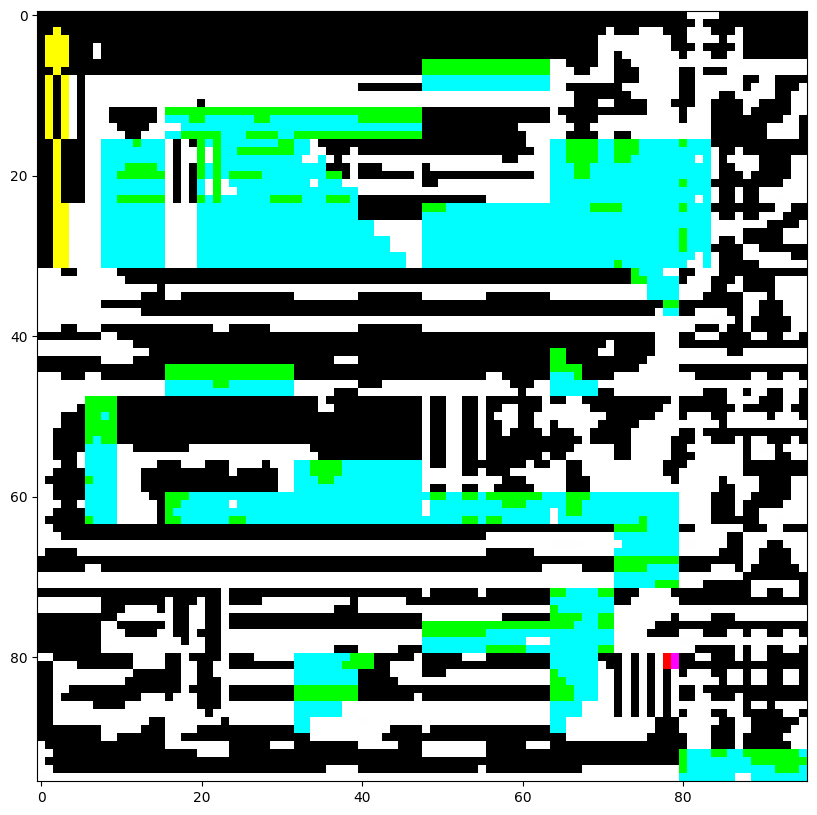

In [122]:
img = plt.imread("/kaggle/data/output/test/generated_96x96/1950_5.jpg")
plt.imshow(img*255);
np.max(img)